In [20]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
#import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as patches
#from matplotlib import animation
#from matplotlib import transforms
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
#from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KDTree
#import pandas as pd
import netCDF4
from eofs.standard import Eof
#import matplotlib.image as imag
#from sklearn.cluster import MiniBatchKMeans
#from sklearn.decomposition import PCA,IncrementalPCA
#from yellowbrick.cluster import KElbowVisualizer
#from matplotlib import ticker
#import cartopy
#import cartopy.feature as cfeature
#import cartopy.crs as ccrs
#from mpl_toolkits.basemap import Basemap
#from statistics import mode
#from scipy.ndimage.filters import uniform_filter1d
#from sklearn.utils import shuffle
#from scipy.stats import norm
#from mpl_toolkits.mplot3d import Axes3D

#import matplotlib.cm as cm
#import warnings
#warnings.filterwarnings("ignore")
#from matplotlib.axes._axes import _log as matplotlib_axes_logger
#matplotlib_axes_logger.setLevel('ERROR')

In [21]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [22]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [23]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-20-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
lats = np.squeeze(extra_variables.LAT_20s_to_20n.values)

In [24]:
Train_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Trackable_Space_Time_W_Test.npy")
Test_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Trackable_Space_Time_W_Test.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")

Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Train_Images = np.interp(Train_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [25]:
Test_Images = np.reshape(Test_Images, (len(Test_Images),30*128))
Train_Images = np.reshape(Train_Images, (len(Train_Images),30*128))

In [26]:
Test_Images.shape

(50688, 3840)

In [27]:
coslat = np.cos(np.deg2rad(lats))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(Test_Images, weights=wgts)
#eofs = solver.eofs(neofs=2)
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=2)
z_test_tsne_track = solver.pcs(npcs=2, pcscaling=1)

In [28]:
Test_Images = np.reshape(Test_Images, (len(Test_Images),30,128))
Train_Images = np.reshape(Train_Images, (len(Train_Images),30,128))

In [29]:
W_0 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-1,:])), axis=1)
W_1 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-2,:])), axis=1)
W_2 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-3,:])), axis=1)
W_3 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-4,:])), axis=1)
W_4 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-5,:])), axis=1)
W_5 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-6,:])), axis=1)
W_6 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-7,:])), axis=1)
W_7 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-8,:])), axis=1)
W_8 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-9,:])), axis=1)
W_9 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-10,:])), axis=1)
W_10 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-11,:])), axis=1)
W_11 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-12,:])), axis=1)
W_12 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-13,:])), axis=1)
W_13 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-14,:])), axis=1)
W_14 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-15,:])), axis=1)
W_15 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-16,:])), axis=1)
W_16 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-17,:])), axis=1)
W_17 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-18,:])), axis=1)
W_18 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-19,:])), axis=1)
W_19 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-20,:])), axis=1)
W_20 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-21,:])), axis=1)
W_21 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-22,:])), axis=1)
W_22 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-23,:])), axis=1)
W_23 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-24,:])), axis=1)
W_24 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-25,:])), axis=1)
W_25 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-26,:])), axis=1)
W_26 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-27,:])), axis=1)
W_27 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-28,:])), axis=1)
W_28 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-29,:])), axis=1)
W_29 = np.nanmean(np.abs(np.squeeze(Test_Images[:,-30,:])), axis=1)

0.01829890187461632
-0.011226518884040375


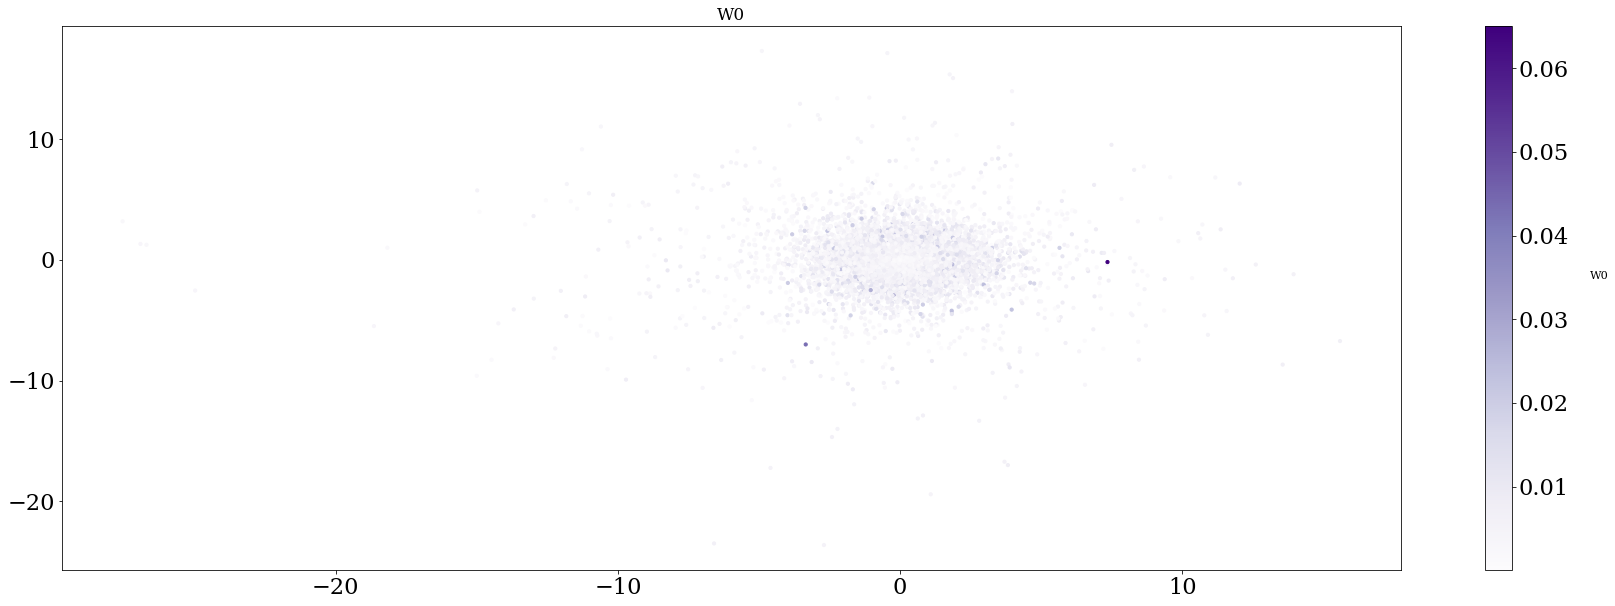

In [30]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_0, cmap="Purples", s=10.0)
ax.set_title("W0", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W0", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_0)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_0)[0])

0.012856883332864288
-0.008885792062255054


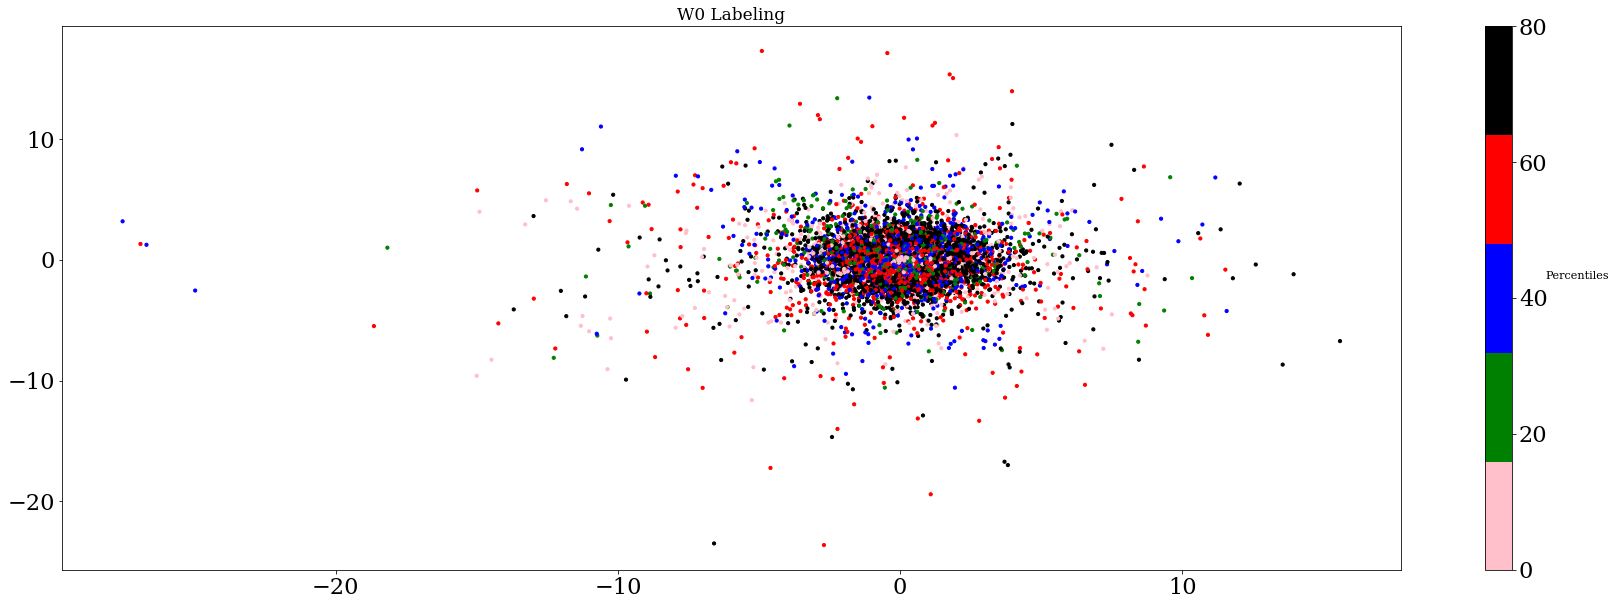

In [31]:
quintiles = np.percentile(W_0, [20,40,60,80])
out = np.searchsorted(quintiles,W_0)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W0 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.017630724433168026
-0.012801562432588178


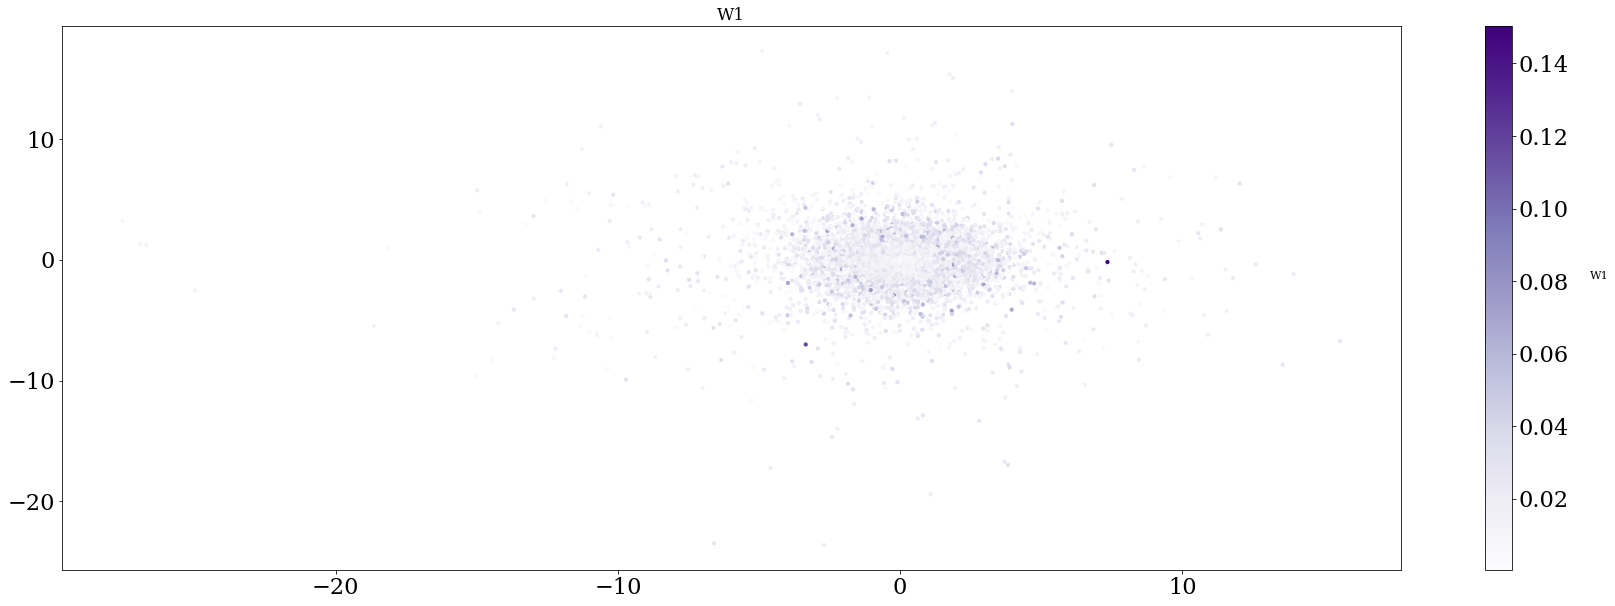

In [32]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_1, cmap="Purples", s=10.0)
ax.set_title("W1", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W1", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_1)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_1)[0])

0.013230607315447519
-0.01009388467716392


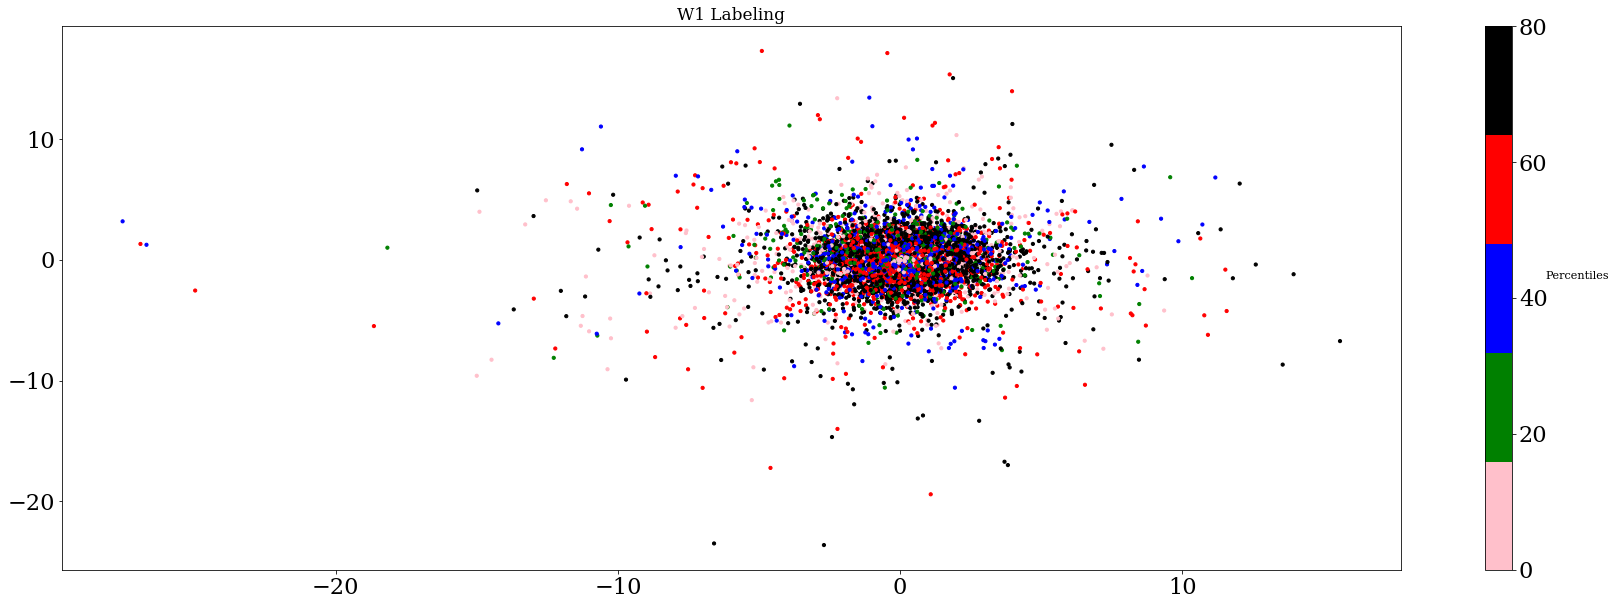

In [33]:
quintiles = np.percentile(W_1, [20,40,60,80])
out = np.searchsorted(quintiles,W_1)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W1 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.01796746194080708
-0.011640308720164697


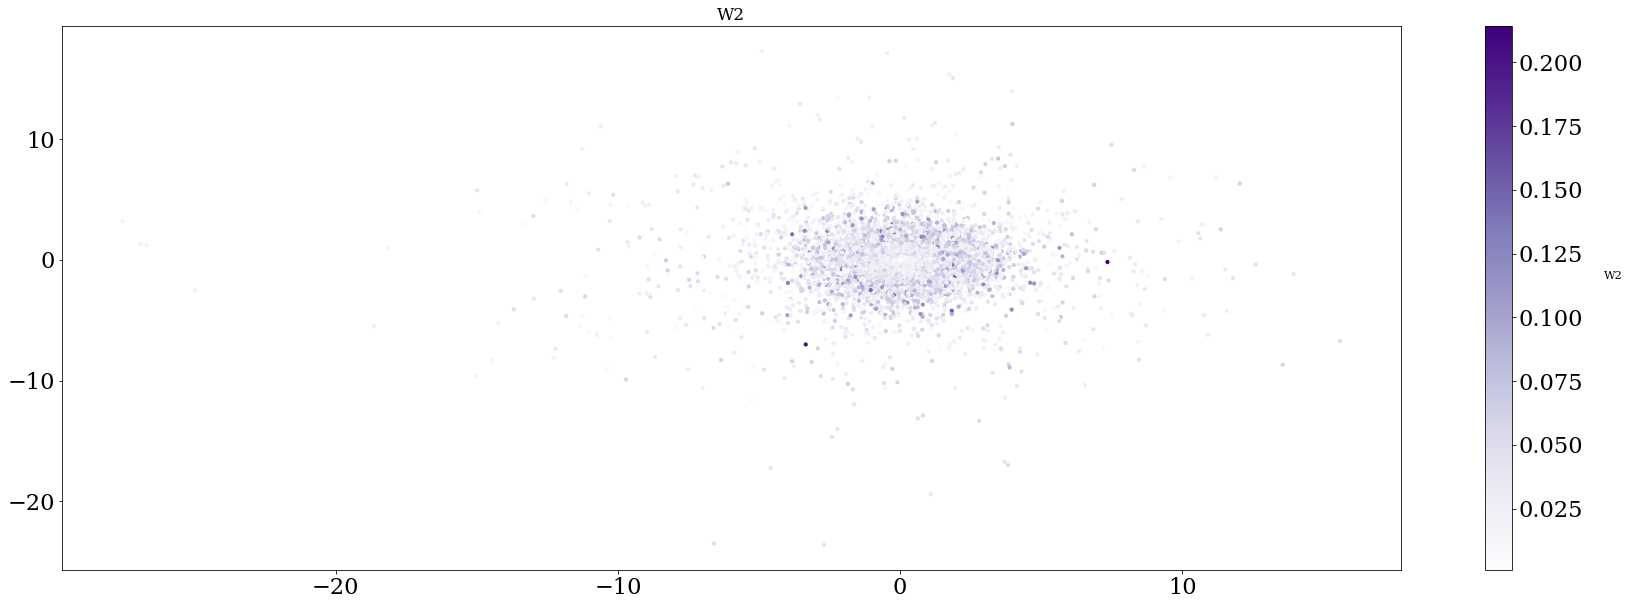

In [34]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_2, cmap="Purples", s=10.0)
ax.set_title("W2", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W2", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_2)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_2)[0])

0.012991862254007659
-0.01075636562311845


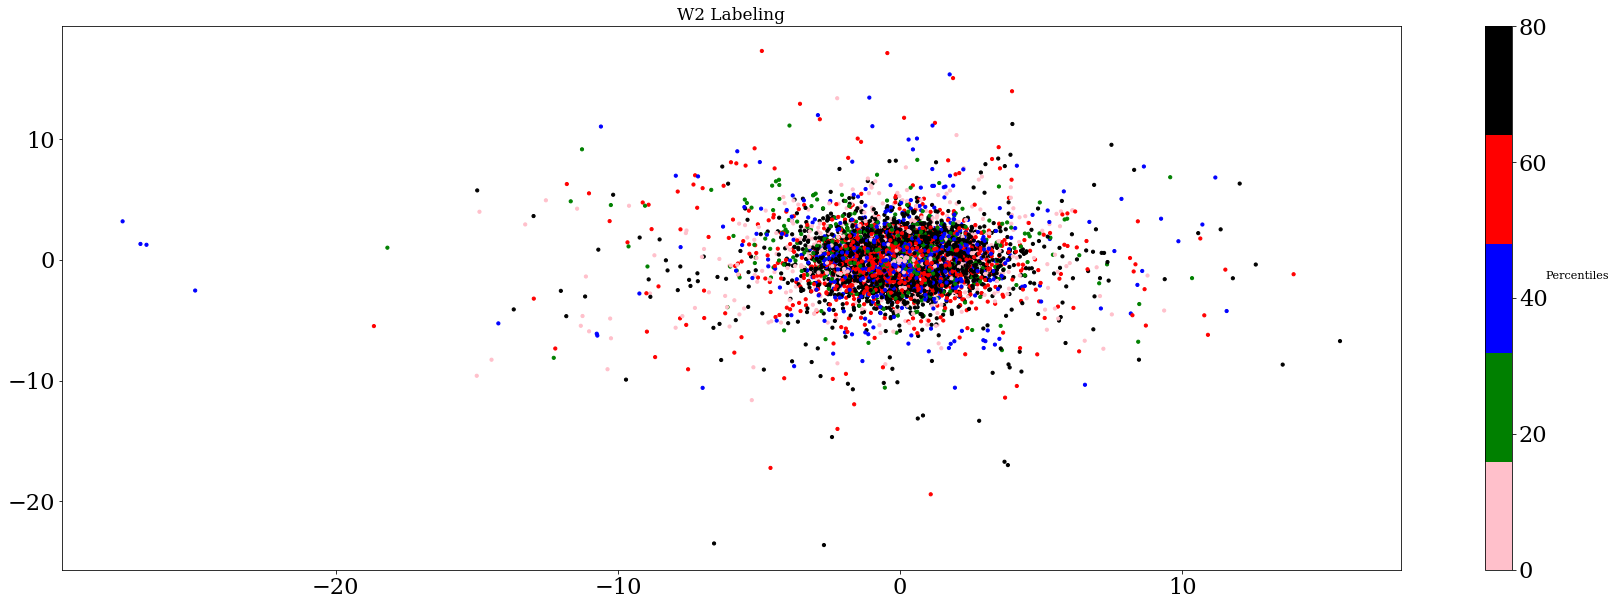

In [35]:
quintiles = np.percentile(W_2, [20,40,60,80])
out = np.searchsorted(quintiles,W_2)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W2 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.018443913265602657
-0.010107330356238951


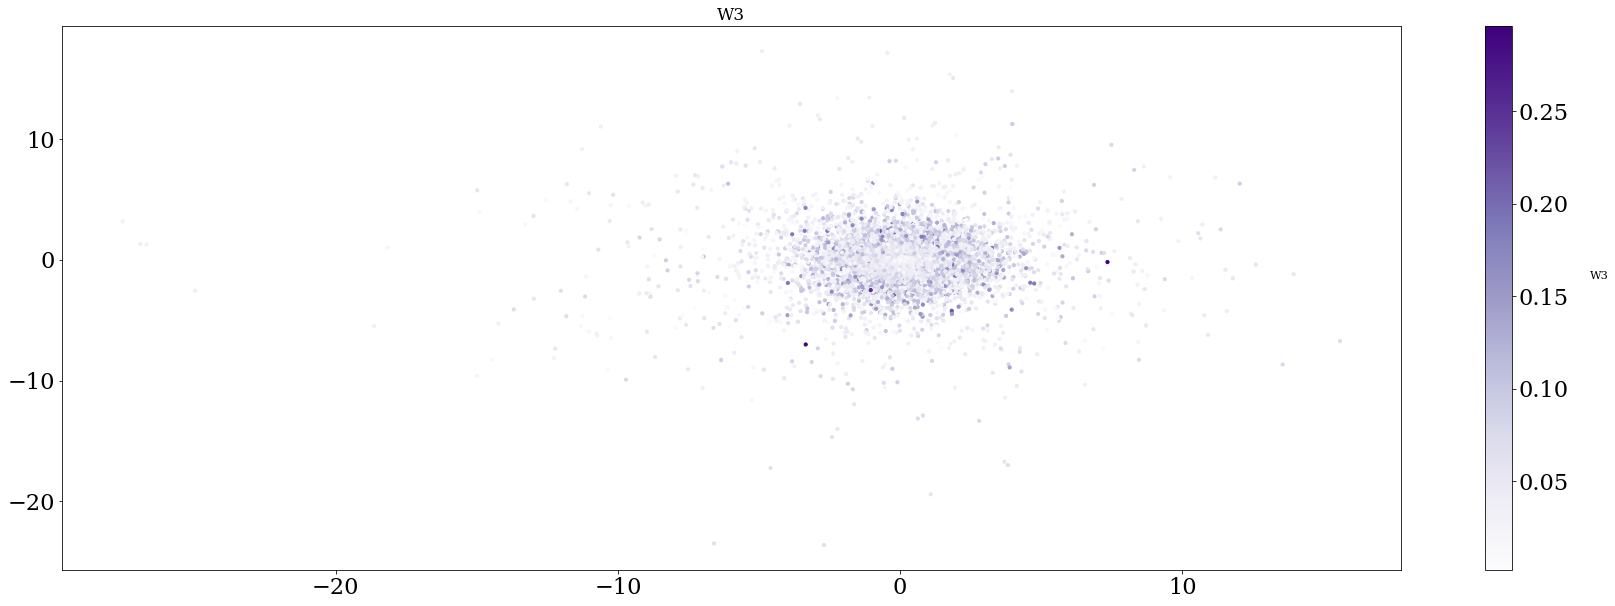

In [36]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_3, cmap="Purples", s=10.0)
ax.set_title("W3", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W3", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_3)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_3)[0])

0.013779215646478002
-0.010530590447723986


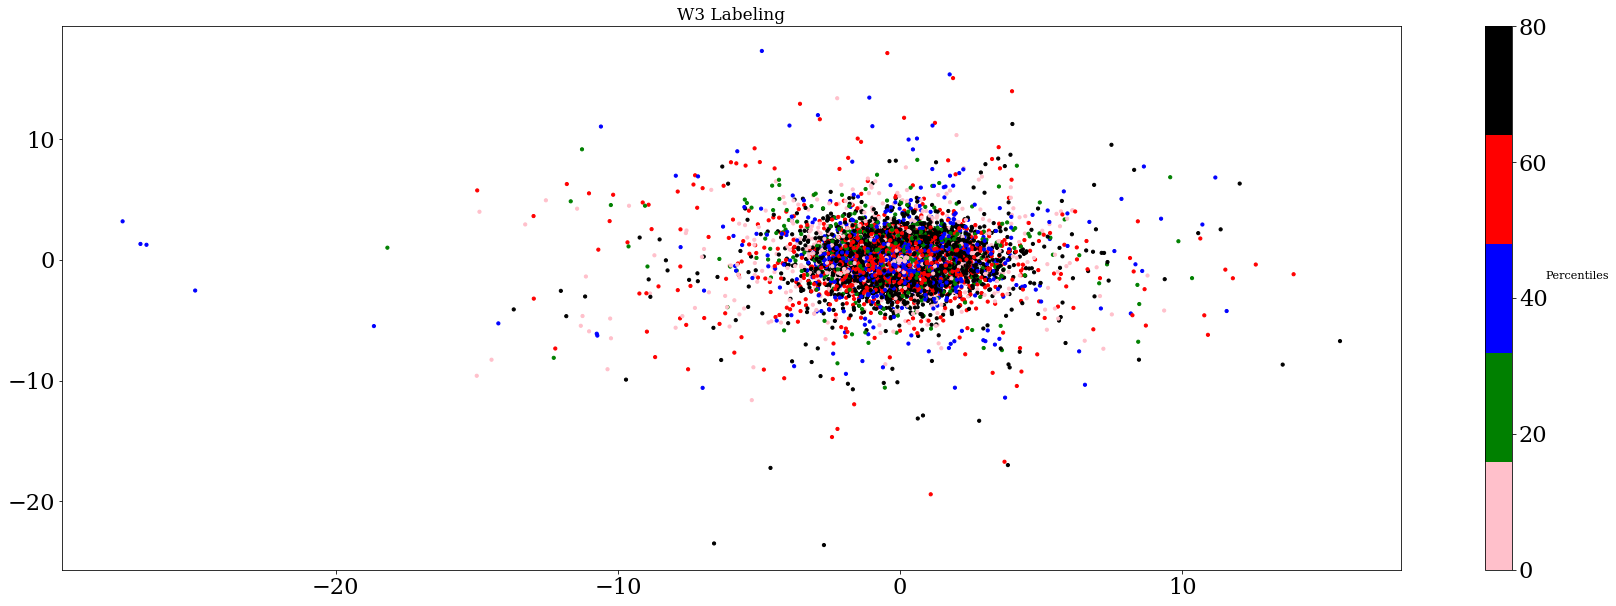

In [37]:
quintiles = np.percentile(W_3, [20,40,60,80])
out = np.searchsorted(quintiles,W_3)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W3 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.01941096526653576
-0.009225294400803183


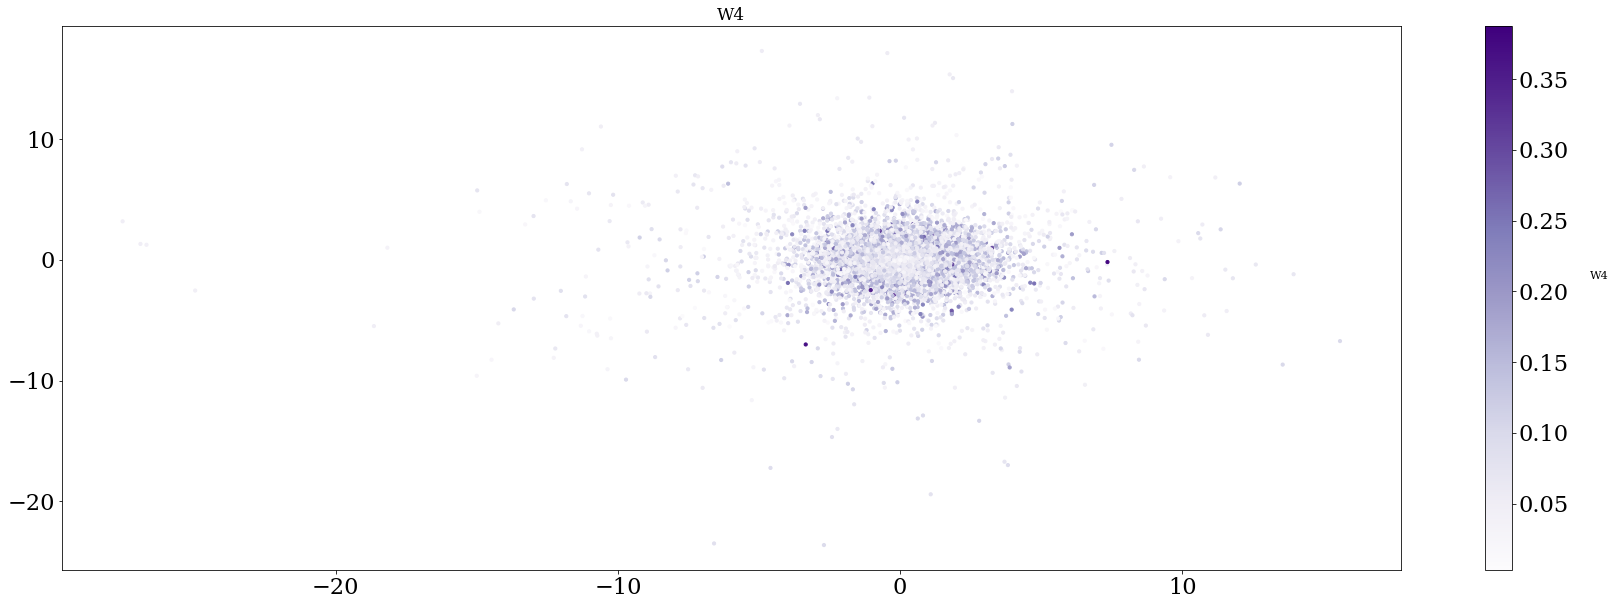

In [38]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_4, cmap="Purples", s=10.0)
ax.set_title("W4", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W4", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_4)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_4)[0])

0.017902099499105005
-0.011363698022630745


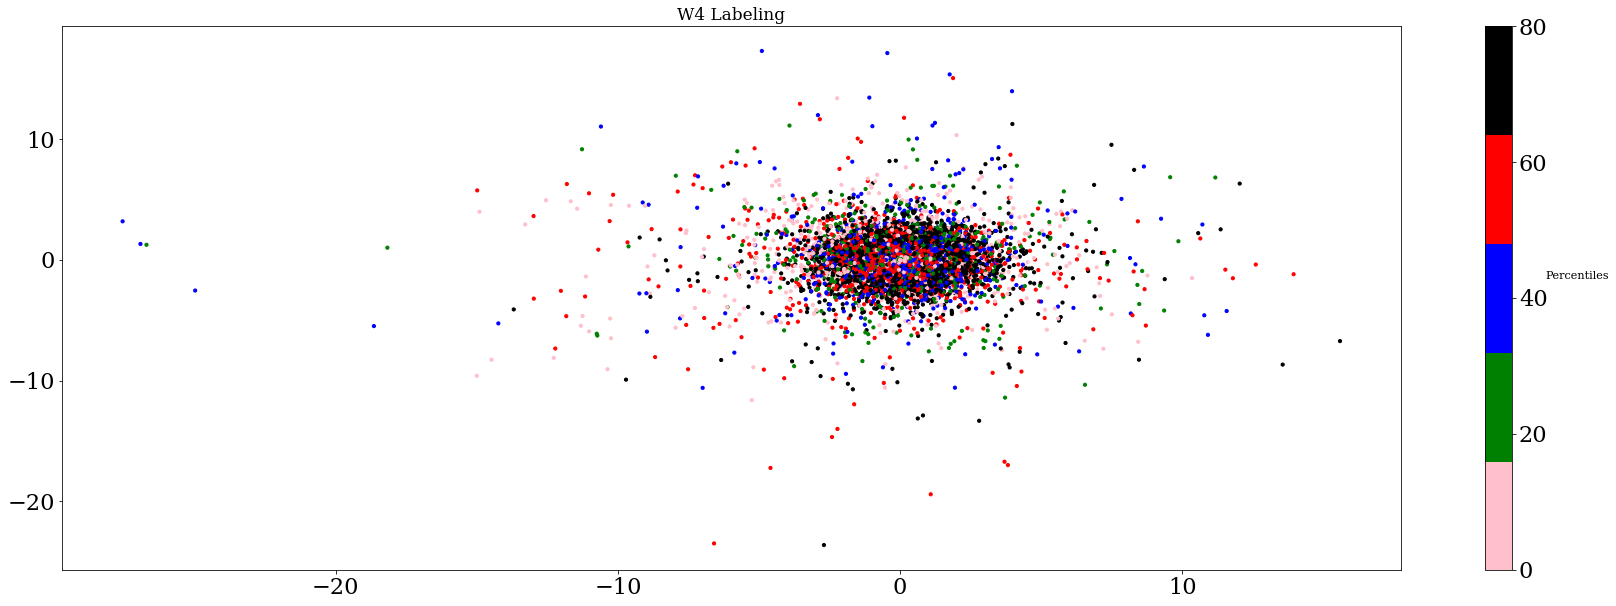

In [39]:
quintiles = np.percentile(W_4, [20,40,60,80])
out = np.searchsorted(quintiles,W_4)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W4 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.019394986302268526
-0.009379089610387704


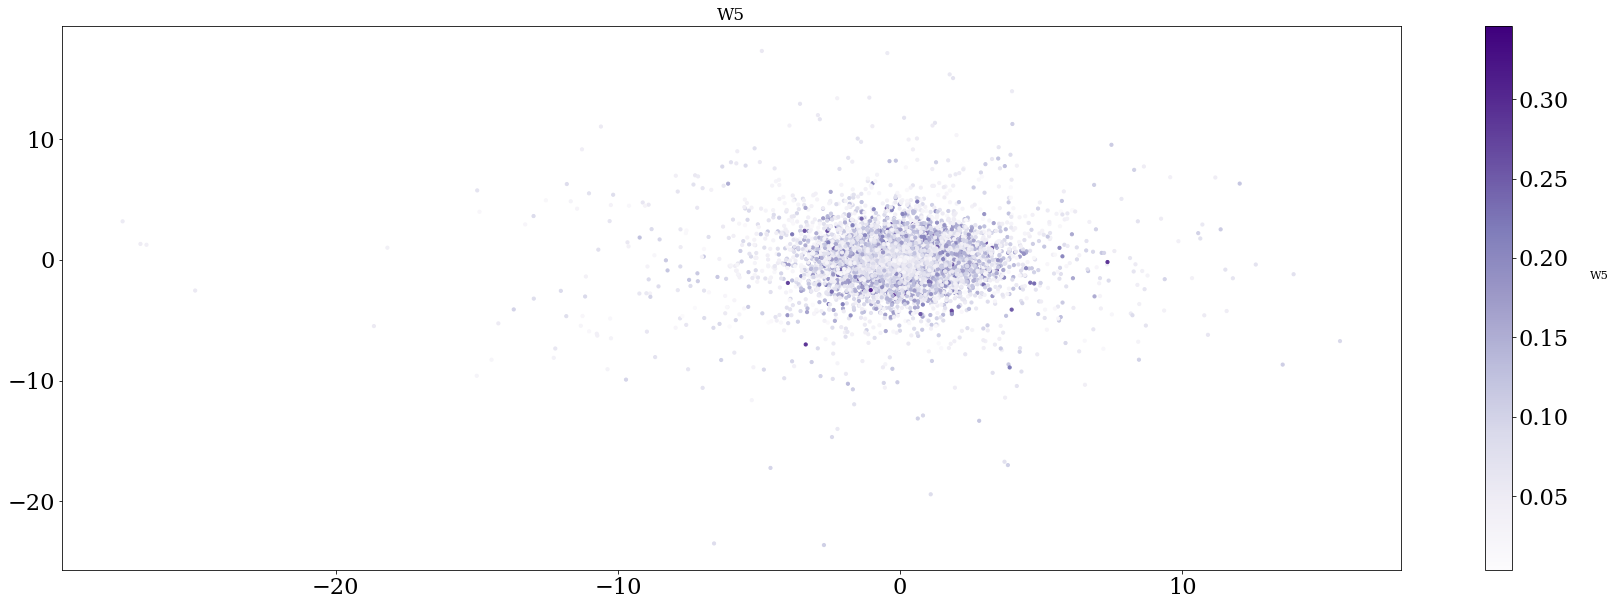

In [40]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_5, cmap="Purples", s=10.0)
ax.set_title("W5", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W5", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_5)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_5)[0])

0.01916750984864869
-0.009792702558009868


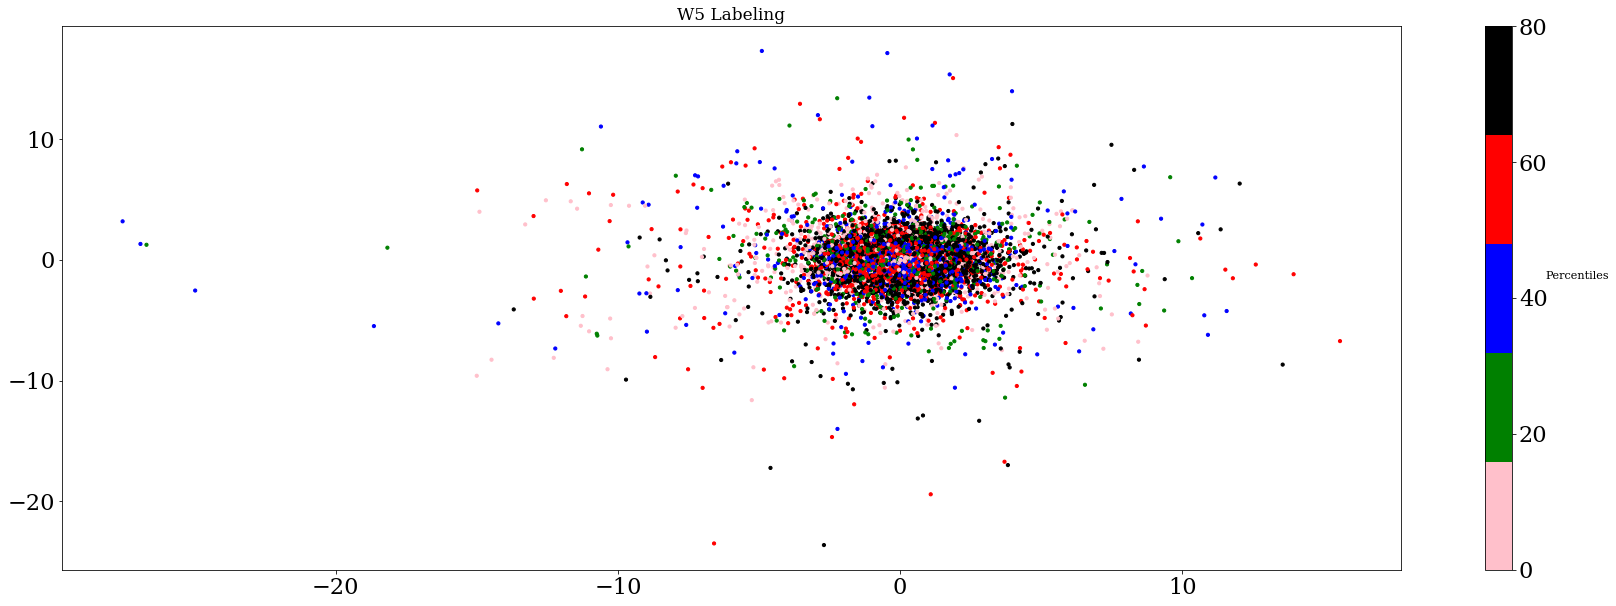

In [41]:
quintiles = np.percentile(W_5, [20,40,60,80])
out = np.searchsorted(quintiles,W_5)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W5 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.019671900922898736
-0.012454114844331475


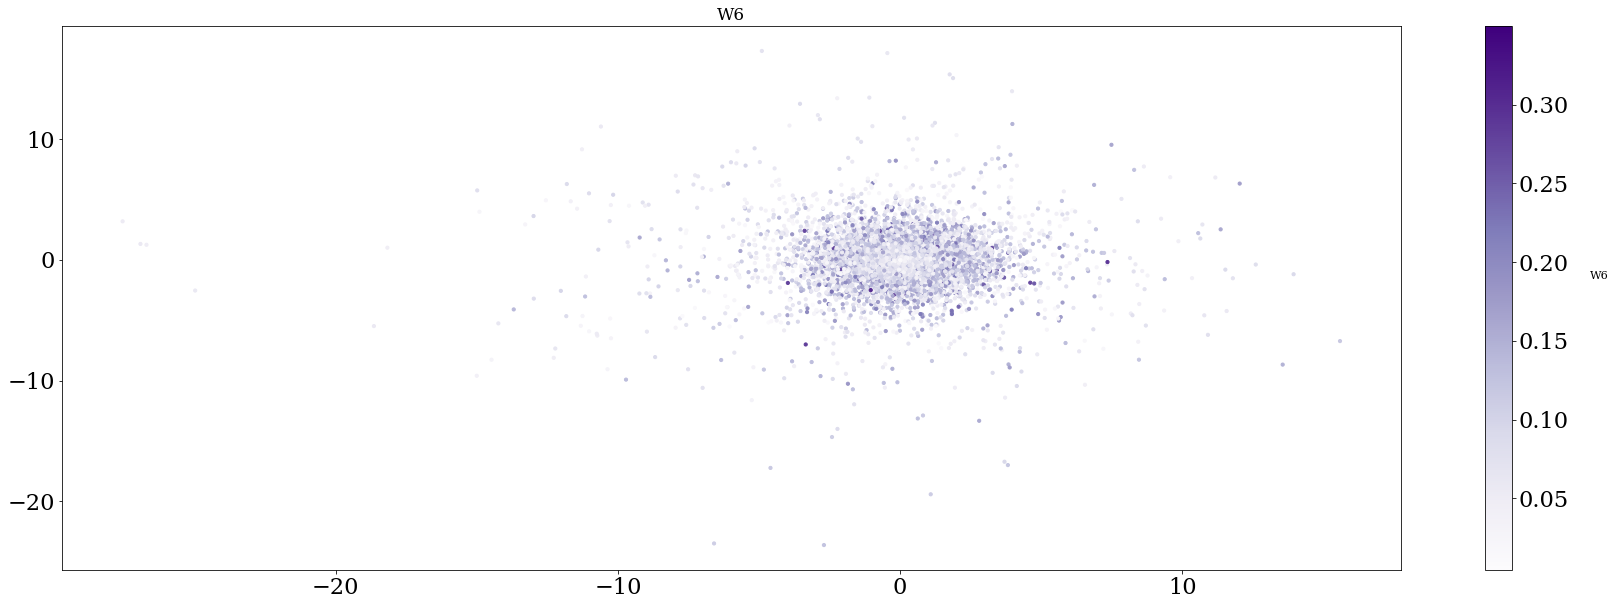

In [42]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_6, cmap="Purples", s=10.0)
ax.set_title("W6", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W6", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_6)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_6)[0])

0.015462032534866613
-0.011648051117753161


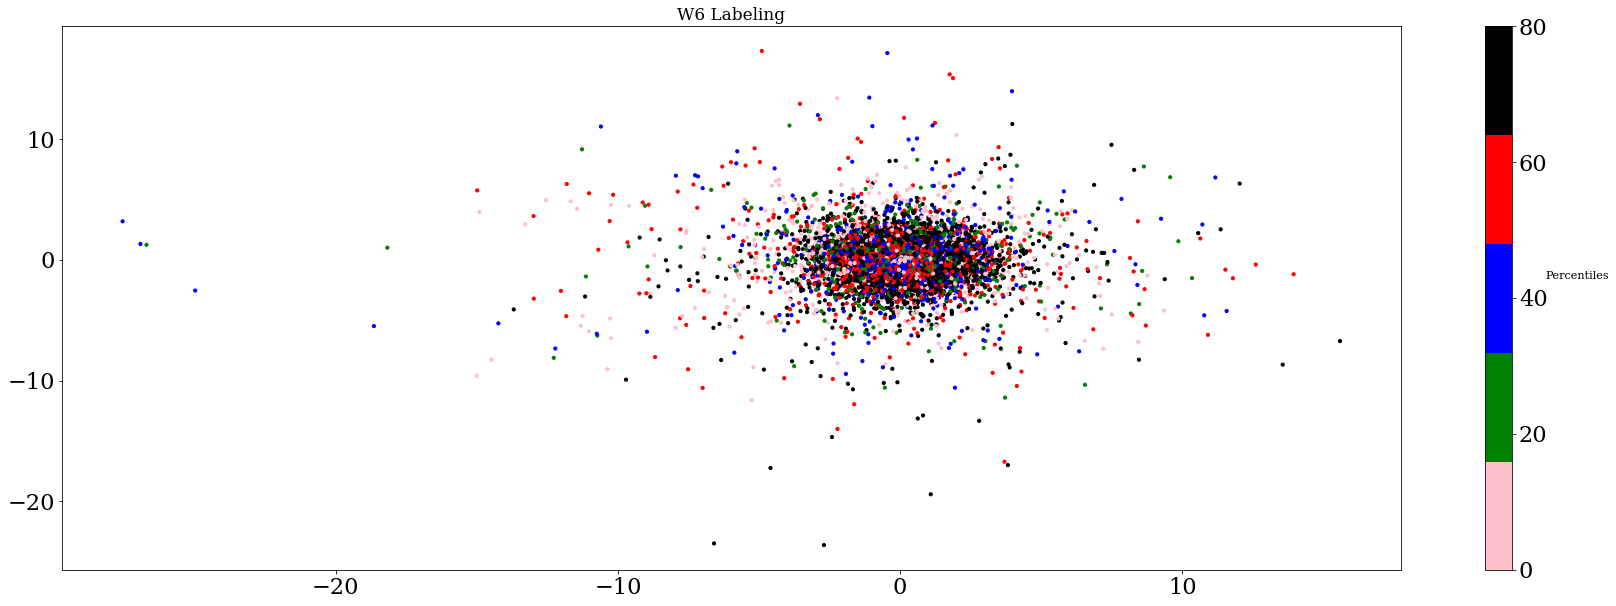

In [43]:
quintiles = np.percentile(W_6, [20,40,60,80])
out = np.searchsorted(quintiles,W_6)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W6 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.022293016904316225
-0.014636441652528304


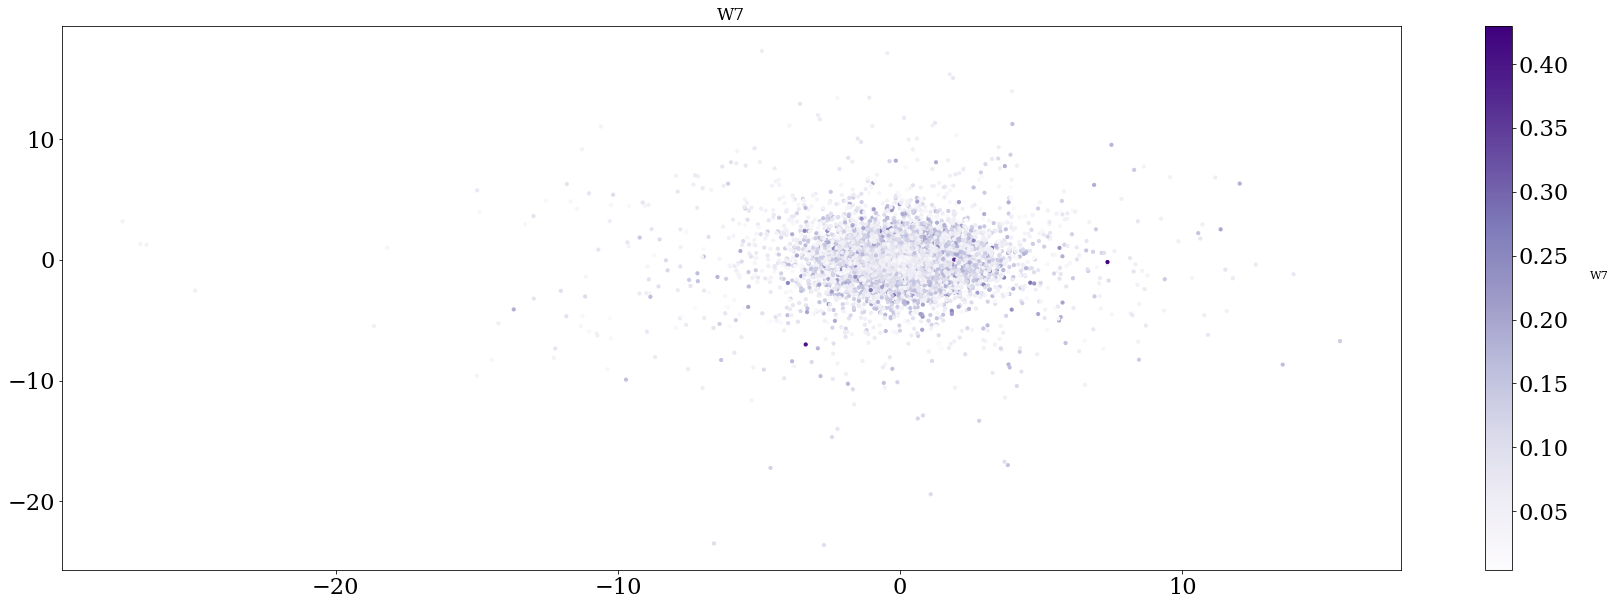

In [44]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_7, cmap="Purples", s=10.0)
ax.set_title("W7", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W7", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_7)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_7)[0])

0.015976179386187533
-0.012890281055485857


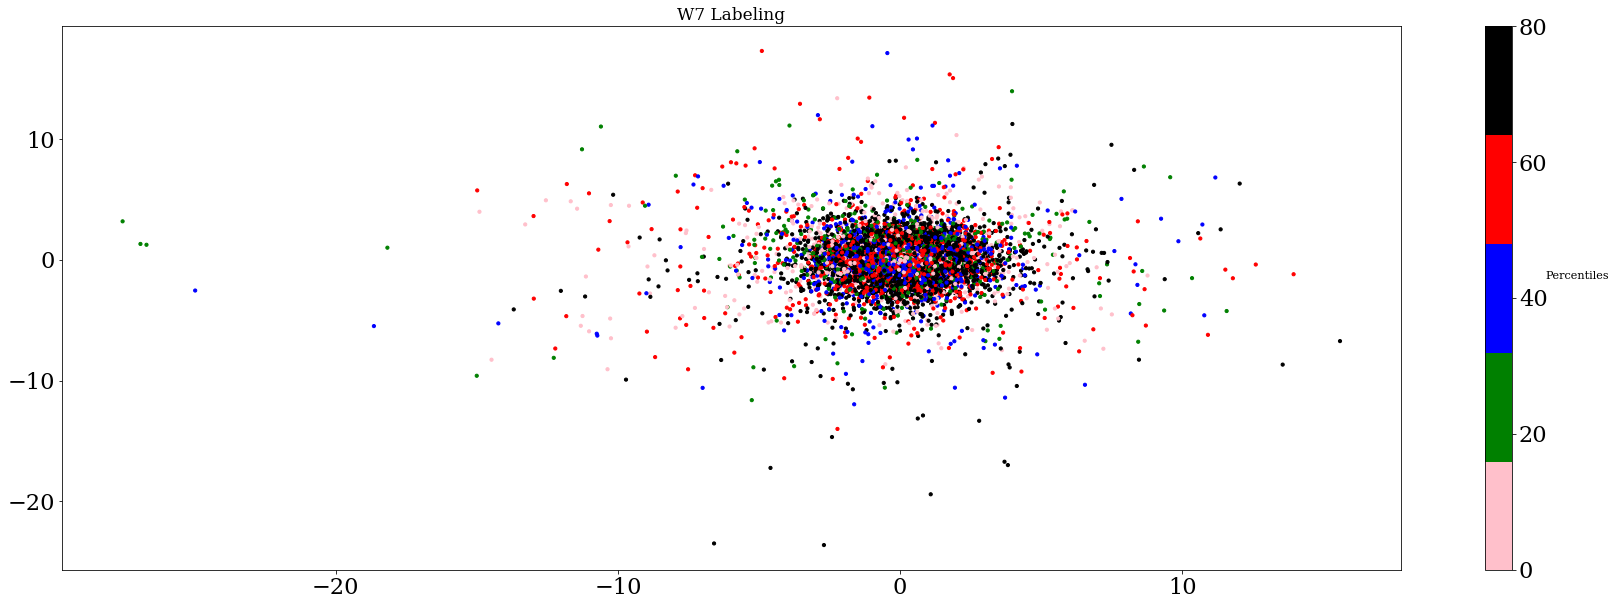

In [45]:
quintiles = np.percentile(W_7, [20,40,60,80])
out = np.searchsorted(quintiles,W_7)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W7 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.020178438577892498
-0.013710331905775893


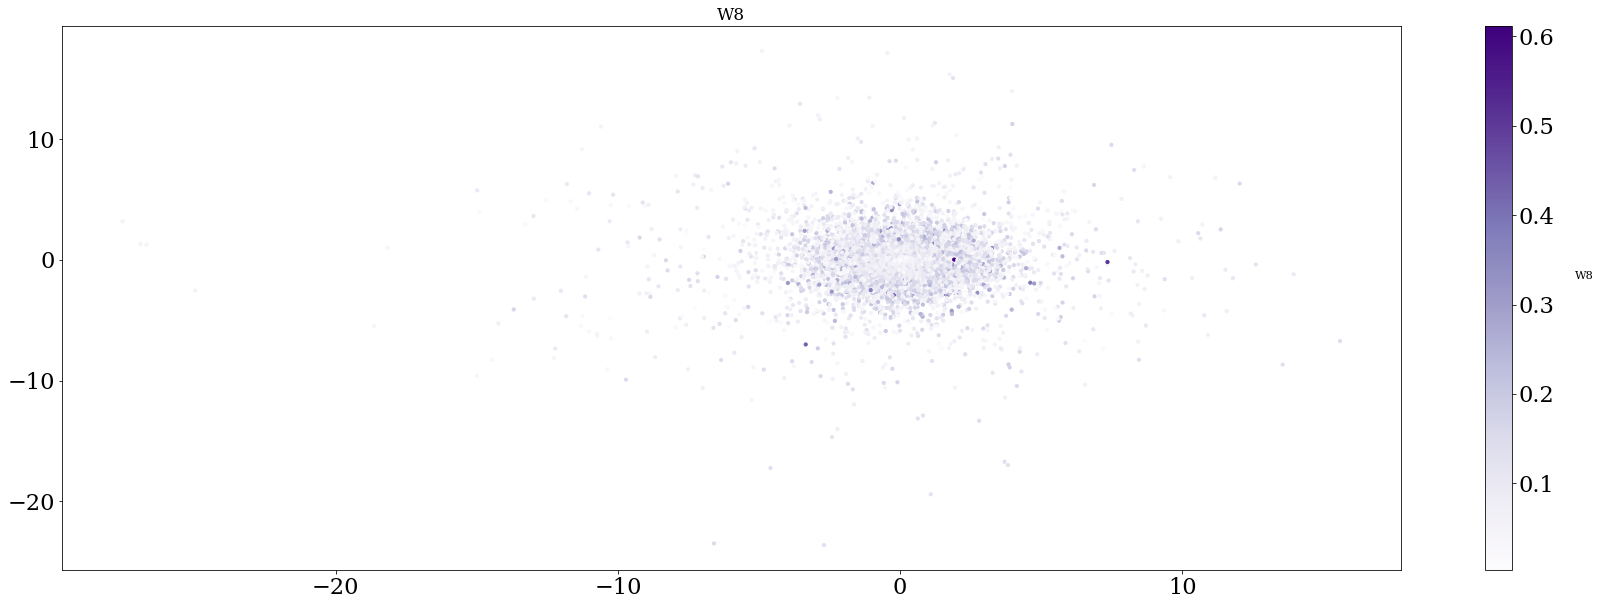

In [46]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_8, cmap="Purples", s=10.0)
ax.set_title("W8", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W8", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_8)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_8)[0])

0.017799738401314116
-0.013049058039943932


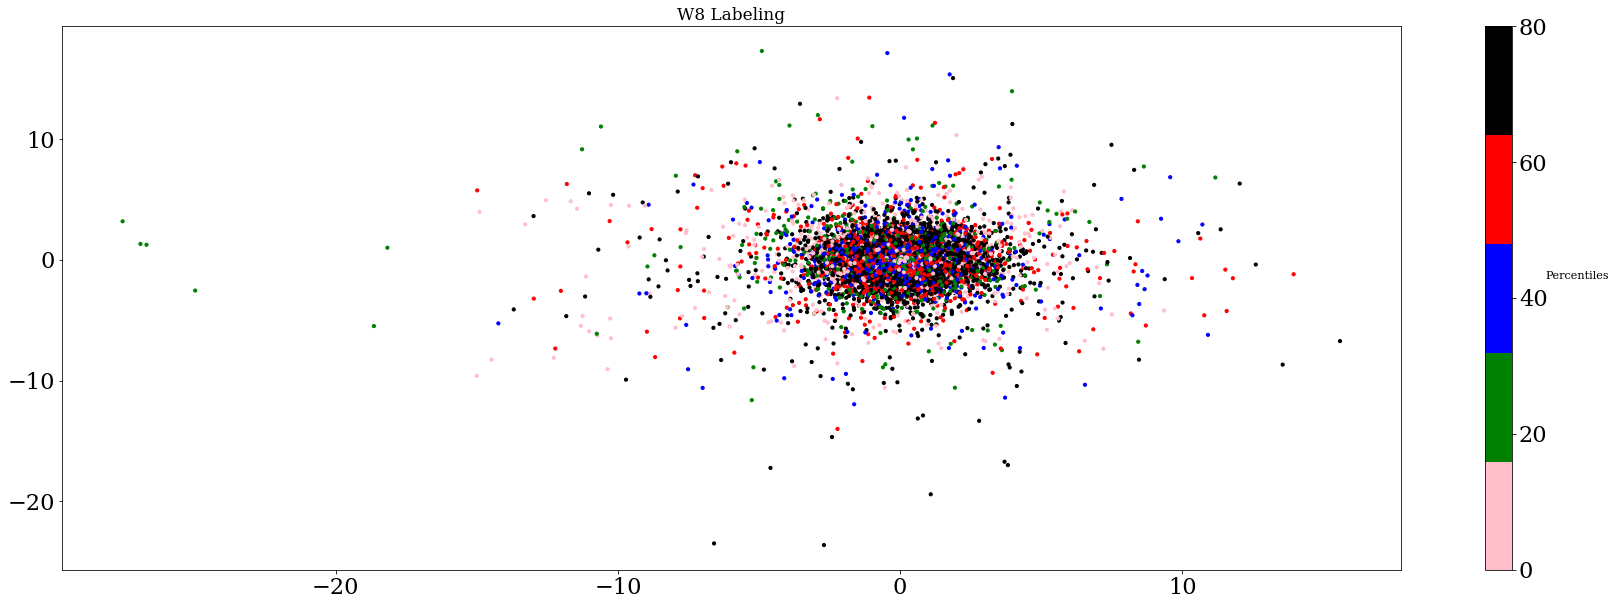

In [47]:
quintiles = np.percentile(W_8, [20,40,60,80])
out = np.searchsorted(quintiles,W_8)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W8 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.01706208867654179
-0.0090811205272408


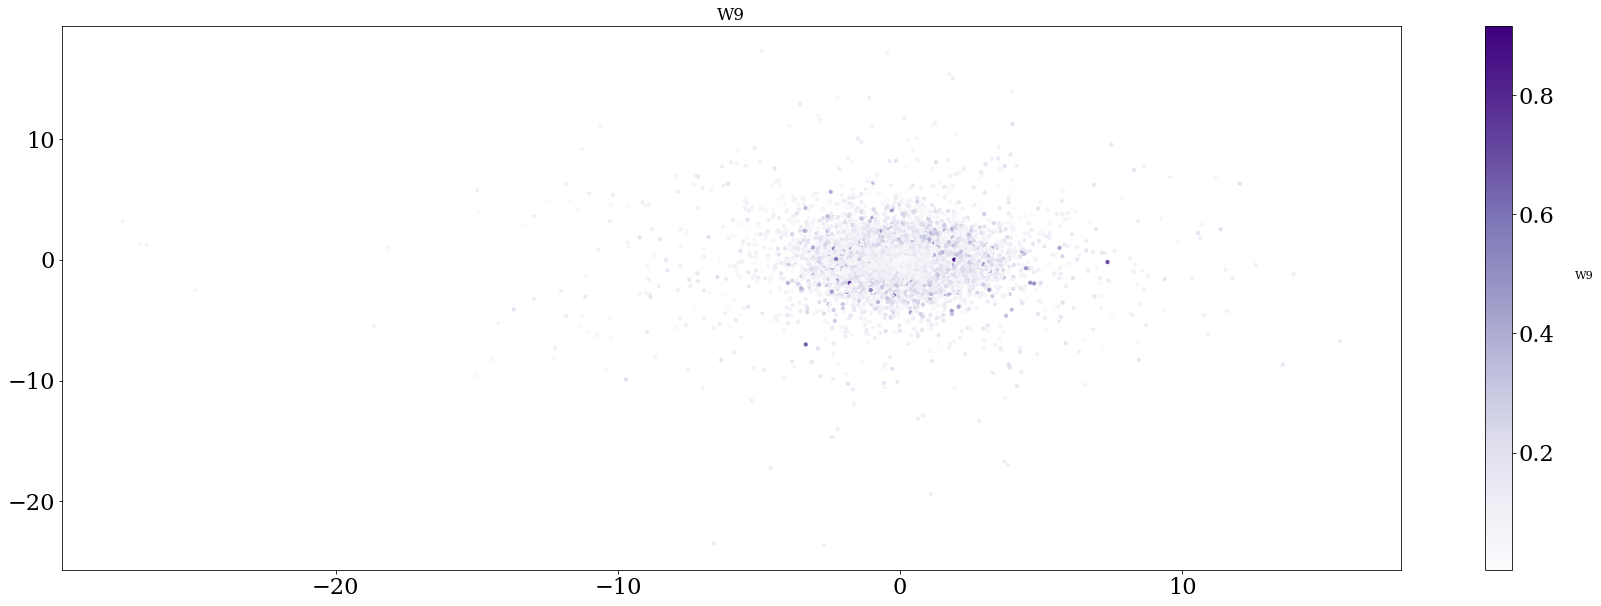

In [48]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_9, cmap="Purples", s=10.0)
ax.set_title("W9", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W9", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_9)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_9)[0])

0.016471646486844918
-0.00855787750853085


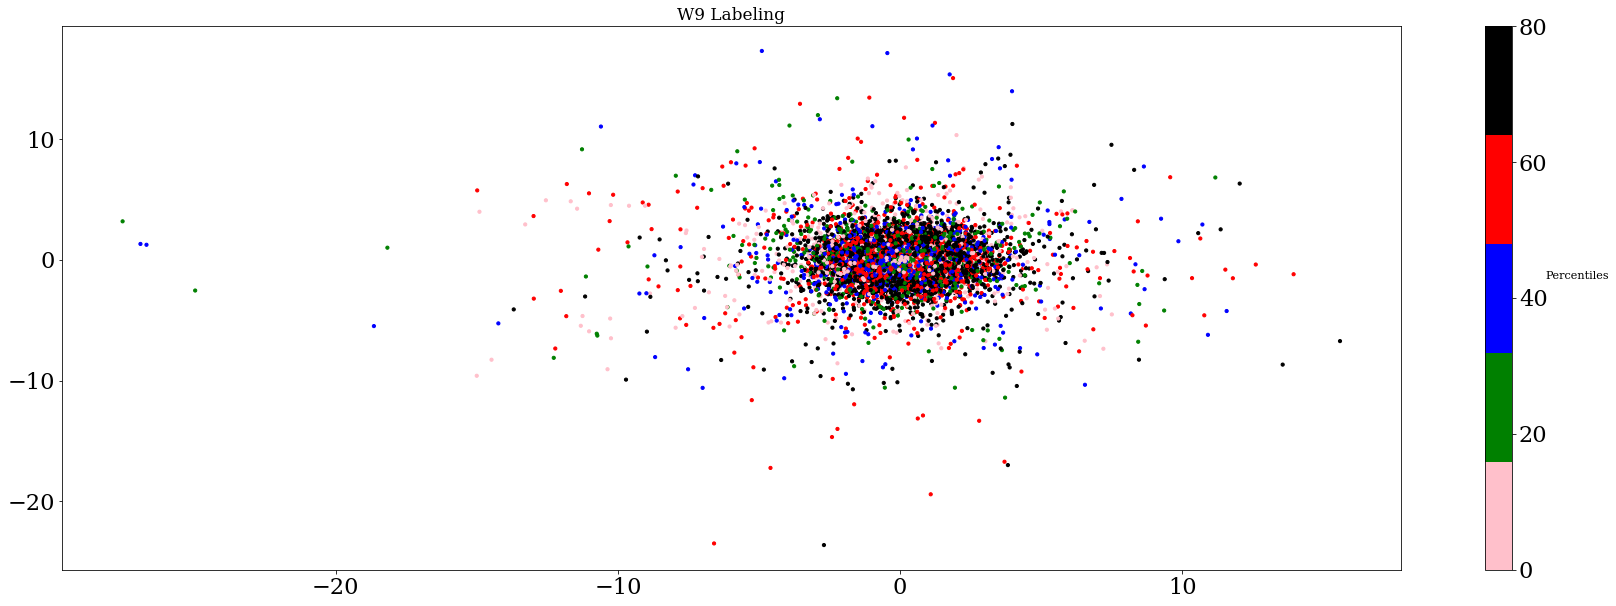

In [49]:
quintiles = np.percentile(W_9, [20,40,60,80])
out = np.searchsorted(quintiles,W_9)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W9 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.01869934734977733
-0.009102711996814747


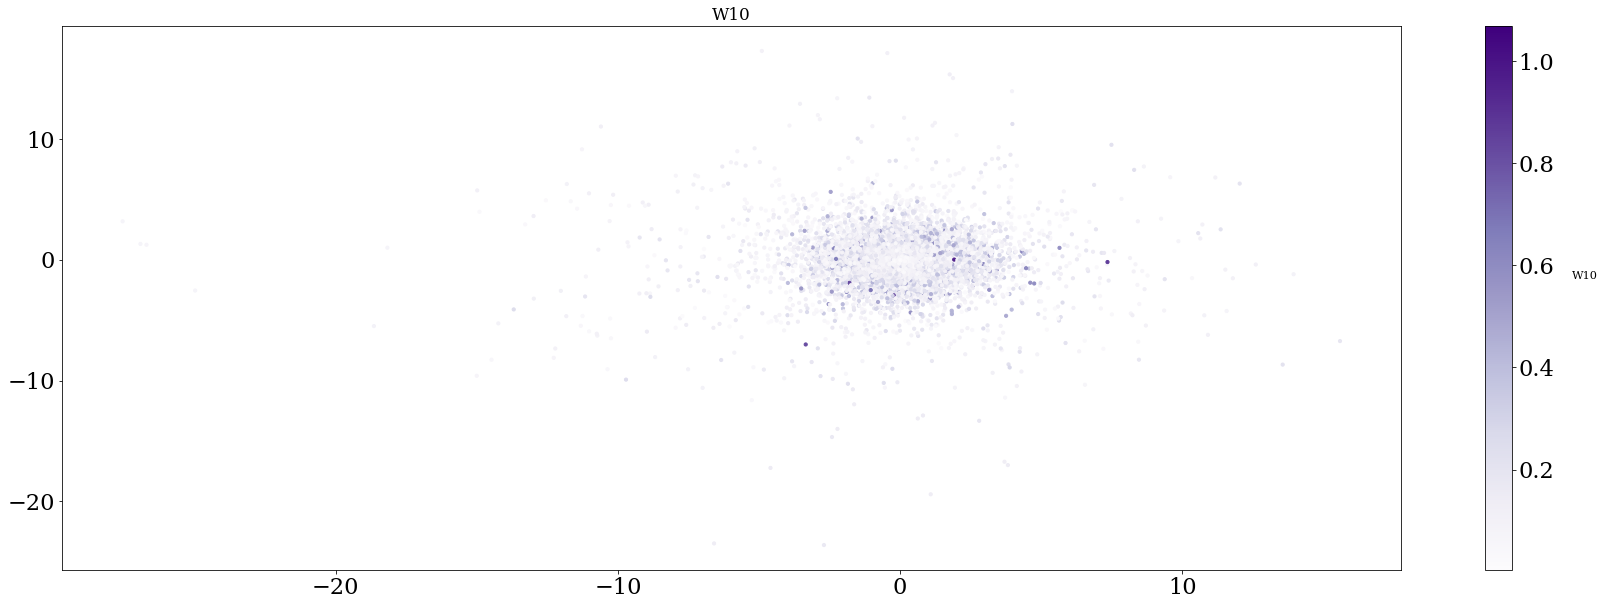

In [50]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_10, cmap="Purples", s=10.0)
ax.set_title("W10", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W10", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_10)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_10)[0])

0.015068483796861418
-0.009671230783688565


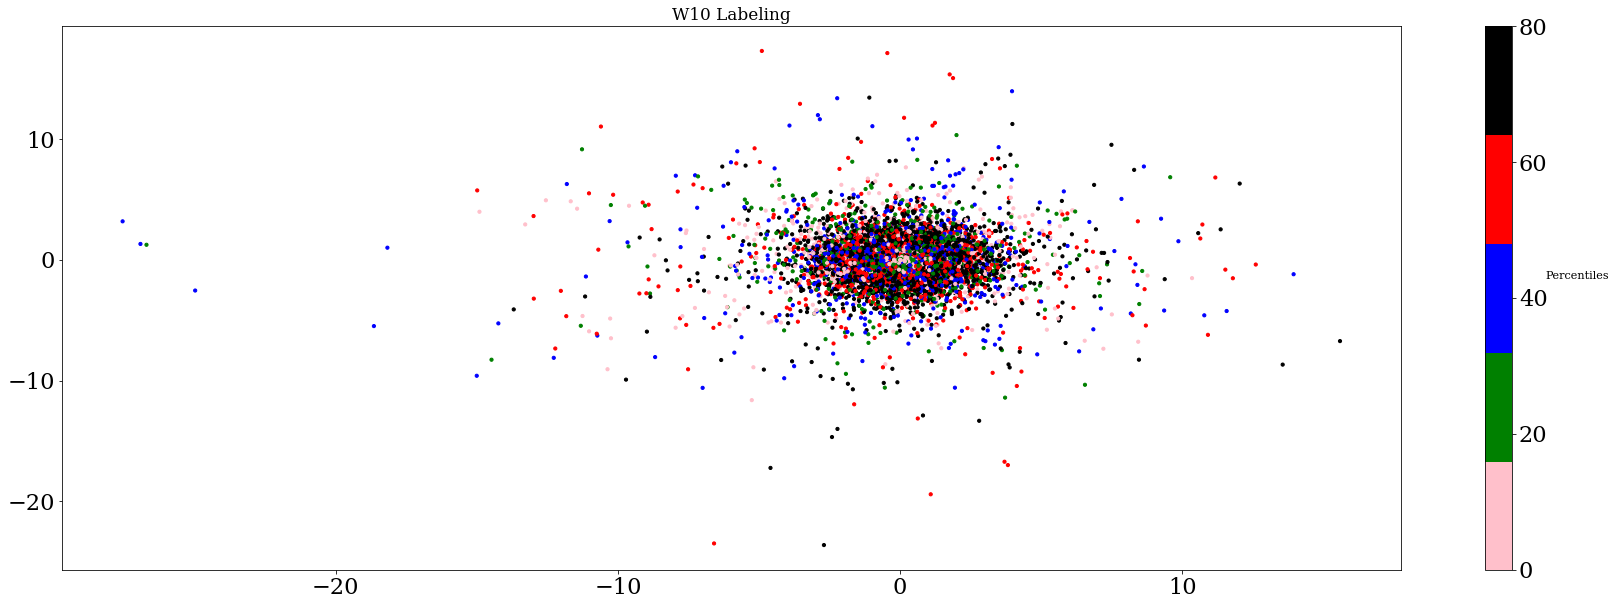

In [51]:
quintiles = np.percentile(W_10, [20,40,60,80])
out = np.searchsorted(quintiles,W_10)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W10 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.020062380370730853
-0.010061476082243146


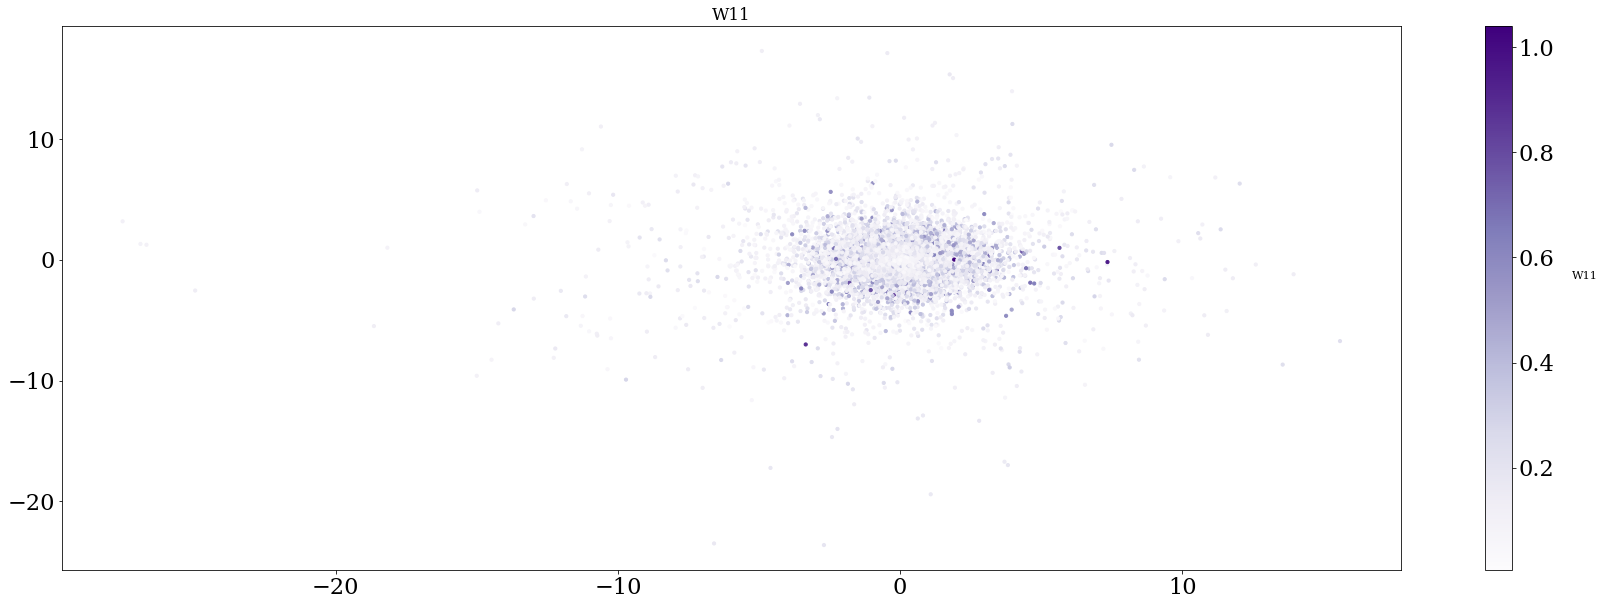

In [52]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_11, cmap="Purples", s=10.0)
ax.set_title("W11", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W11", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_11)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_11)[0])

0.011019881493636181
-0.010466183354027362


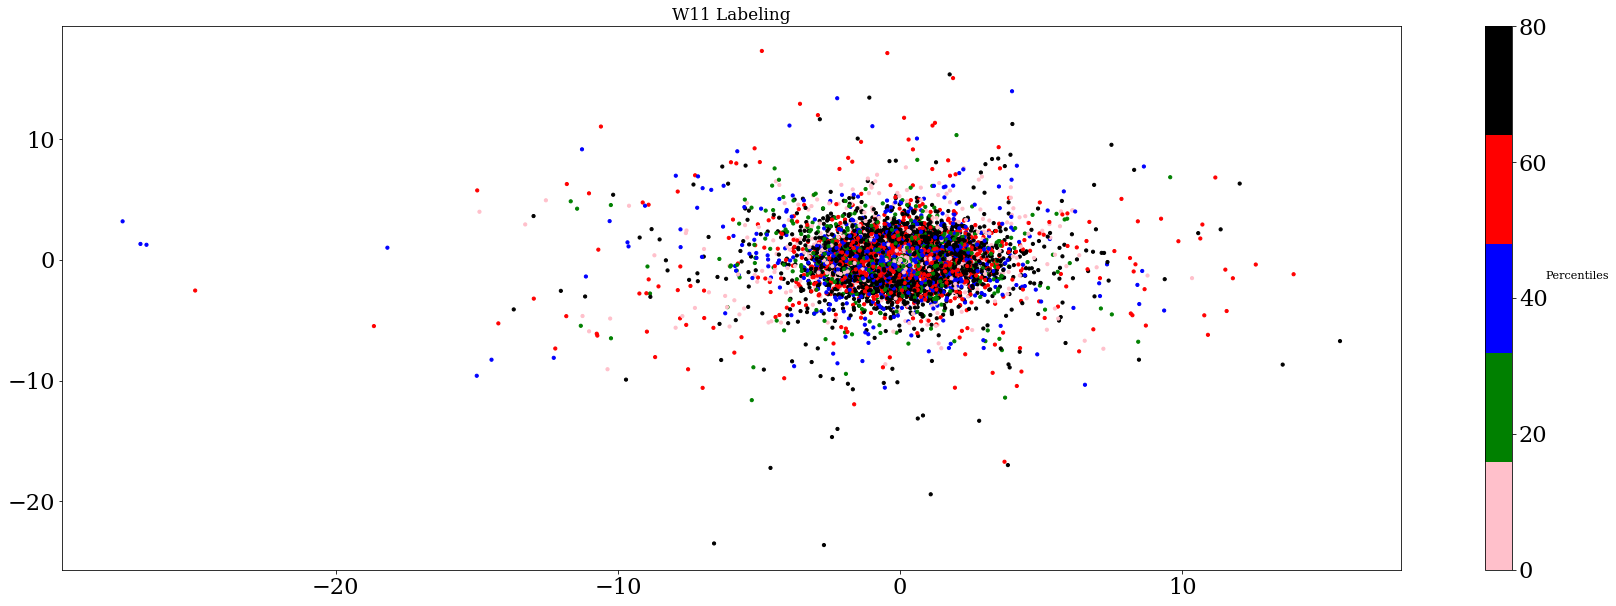

In [53]:
quintiles = np.percentile(W_11, [20,40,60,80])
out = np.searchsorted(quintiles,W_11)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W11 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.017547230971182253
-0.012102195140884944


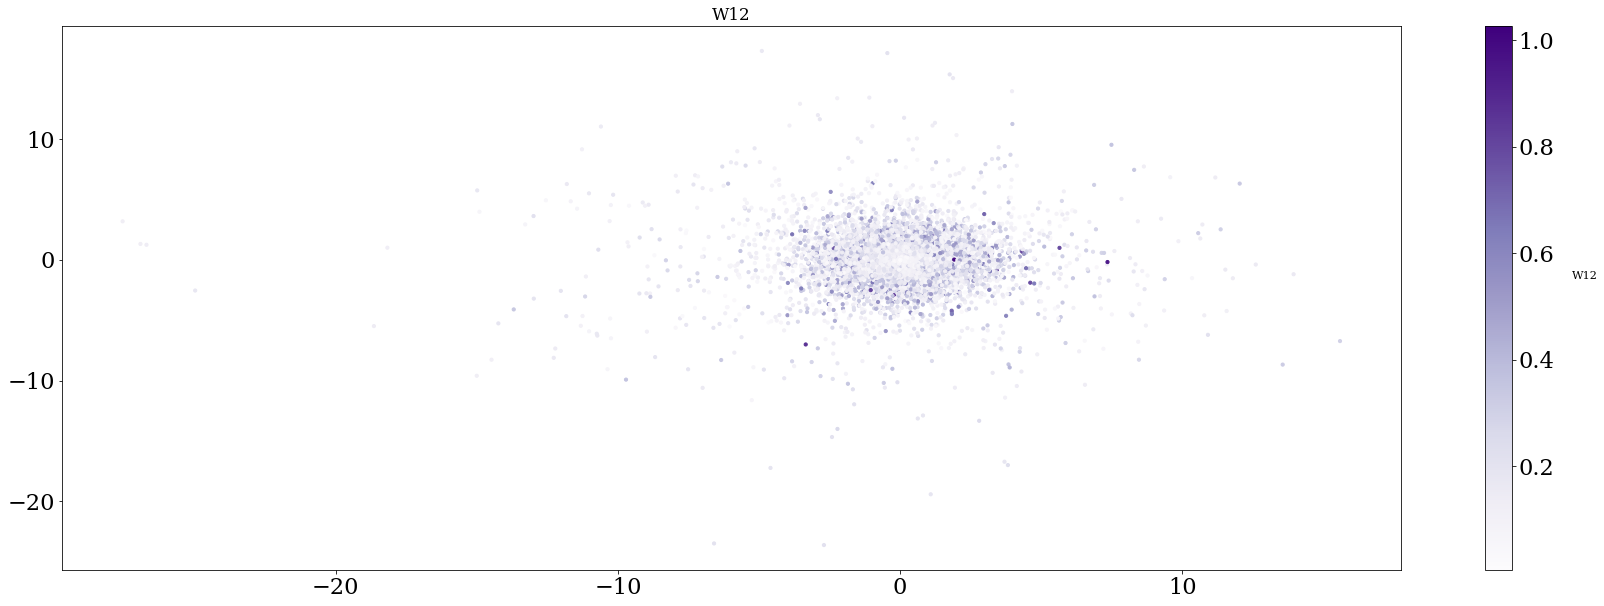

In [54]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_12, cmap="Purples", s=10.0)
ax.set_title("W12", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W12", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_12)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_12)[0])

0.0030659408831912654
-0.009371752734384781


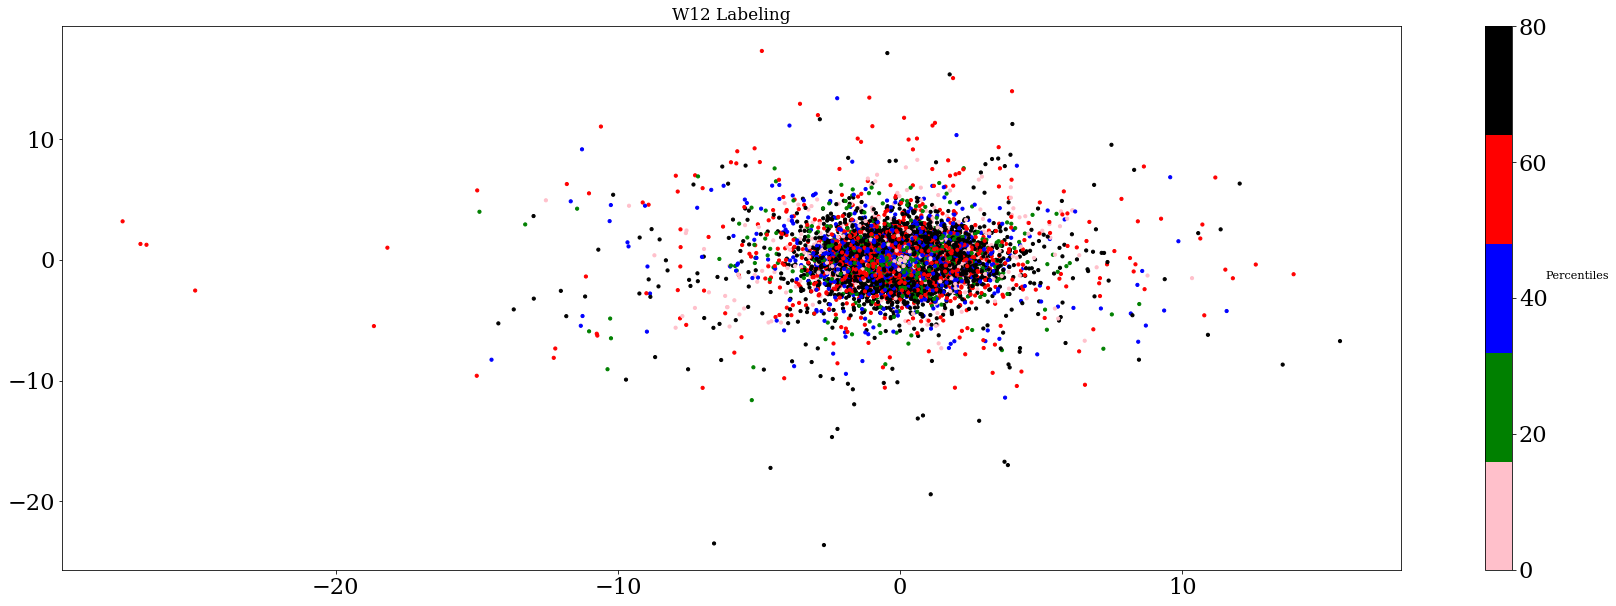

In [55]:
quintiles = np.percentile(W_12, [20,40,60,80])
out = np.searchsorted(quintiles,W_12)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W12 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.012911583102876257
-0.011090882717889773


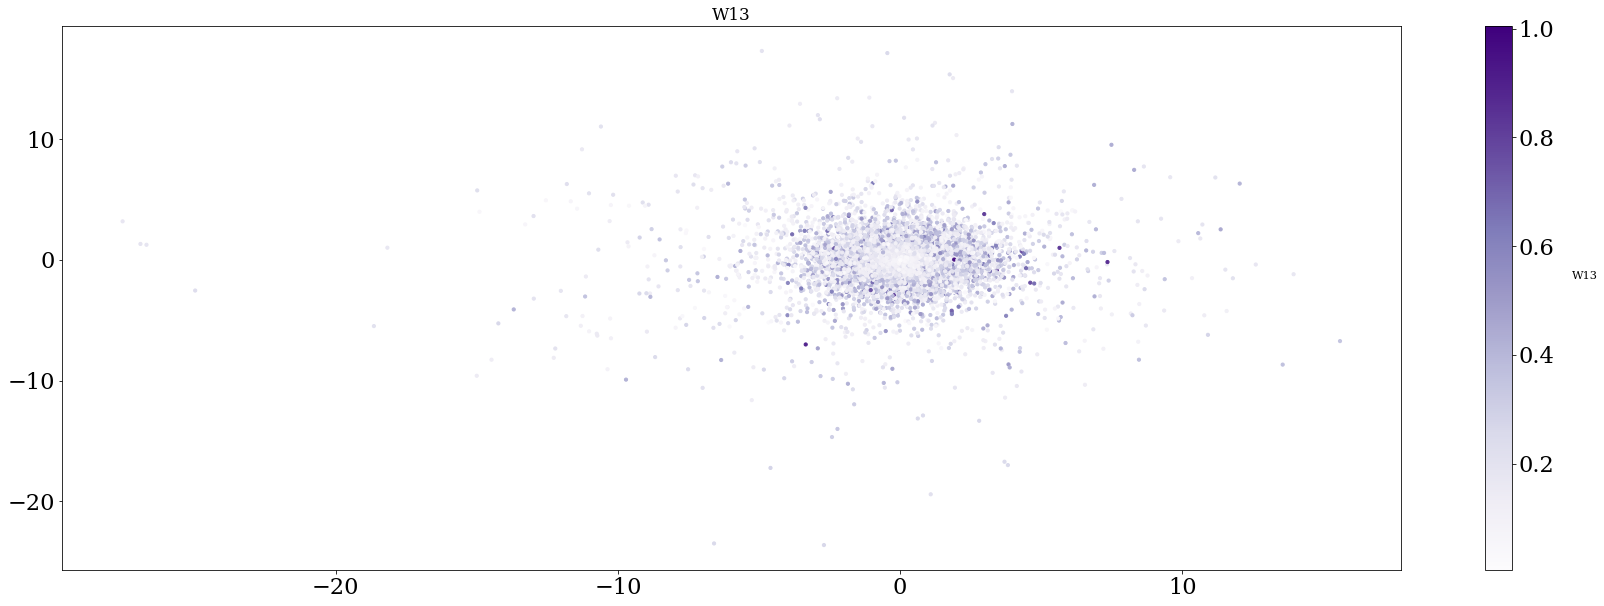

In [56]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_13, cmap="Purples", s=10.0)
ax.set_title("W13", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W13", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_13)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_13)[0])

-0.0011399189197222842
-0.007316969753049704


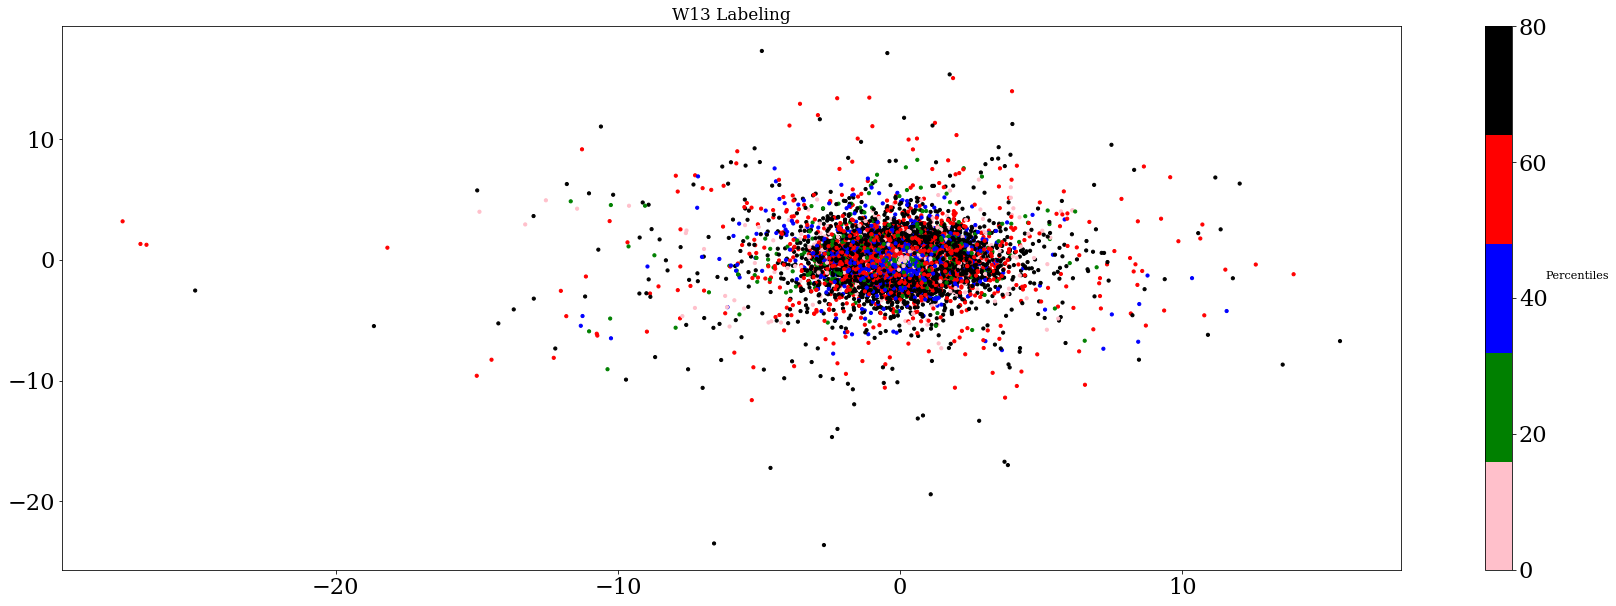

In [57]:
quintiles = np.percentile(W_13, [20,40,60,80])
out = np.searchsorted(quintiles,W_13)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W13 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.009873060903273145
-0.009411809840578756


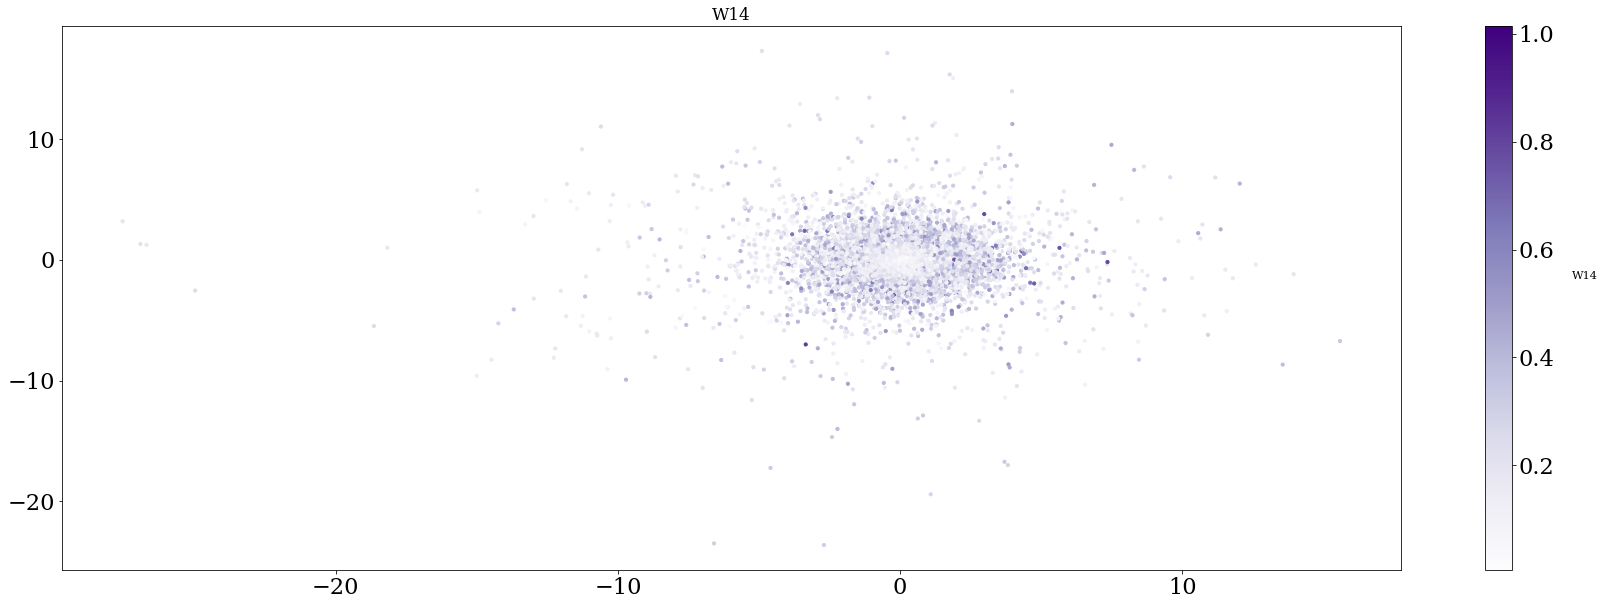

In [58]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_14, cmap="Purples", s=10.0)
ax.set_title("W14", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W14", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_14)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_14)[0])

-0.0025387975765439976
-0.0027110950685590835


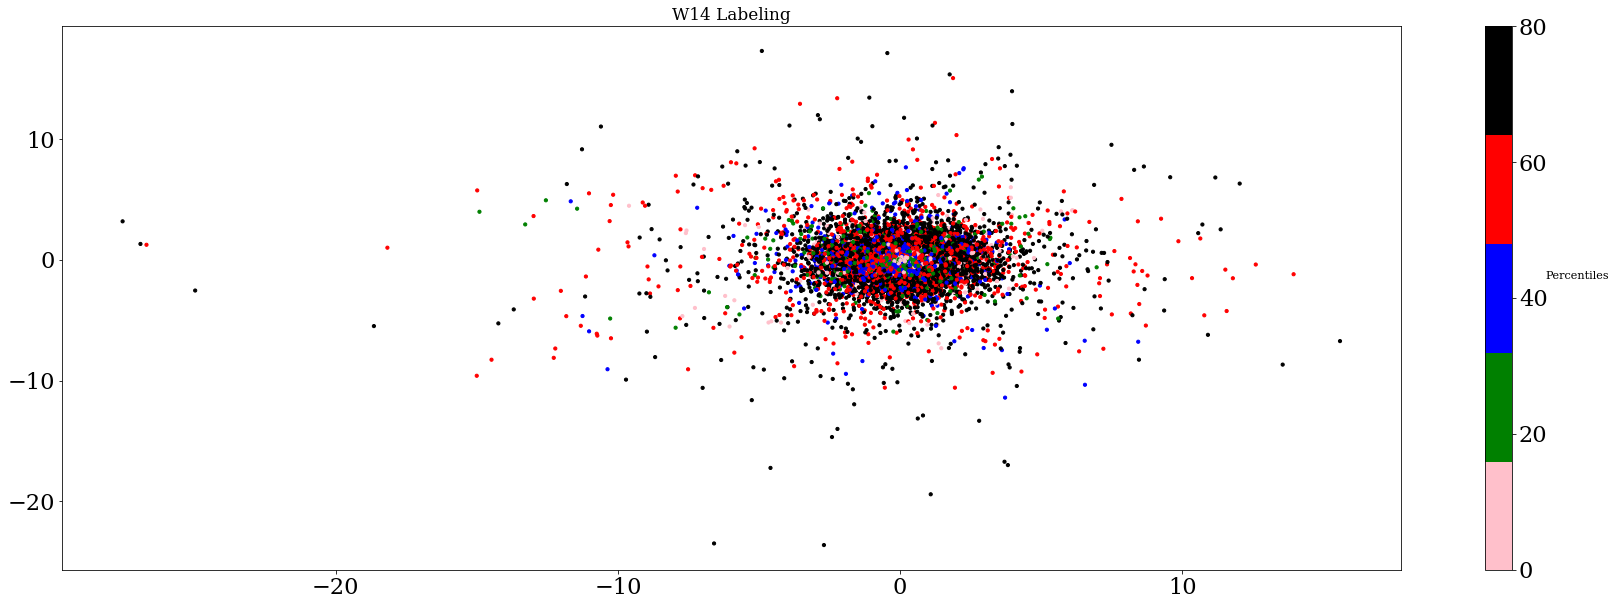

In [59]:
quintiles = np.percentile(W_14, [20,40,60,80])
out = np.searchsorted(quintiles,W_14)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W14 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.004548463487585061
-0.007377782285580033


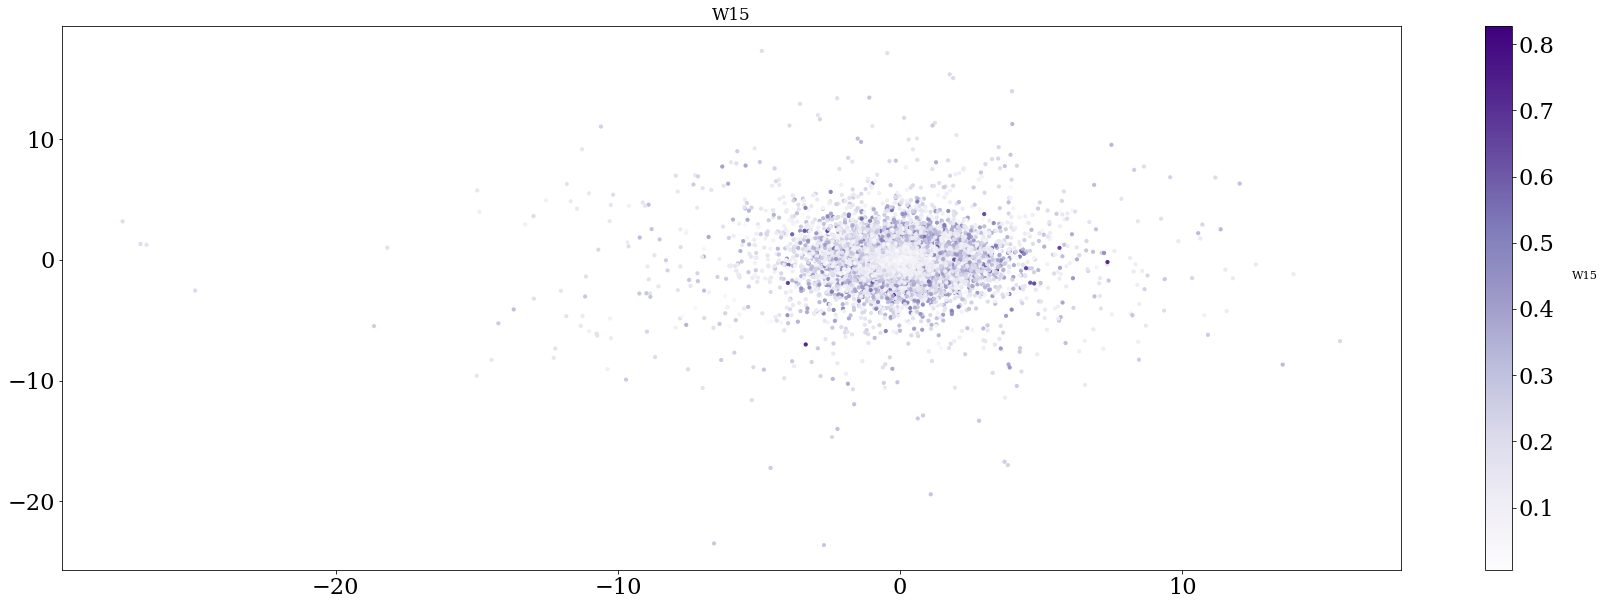

In [60]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_15, cmap="Purples", s=10.0)
ax.set_title("W15", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W15", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_15)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_15)[0])

-0.008255495753594643
-0.0010486577576390307


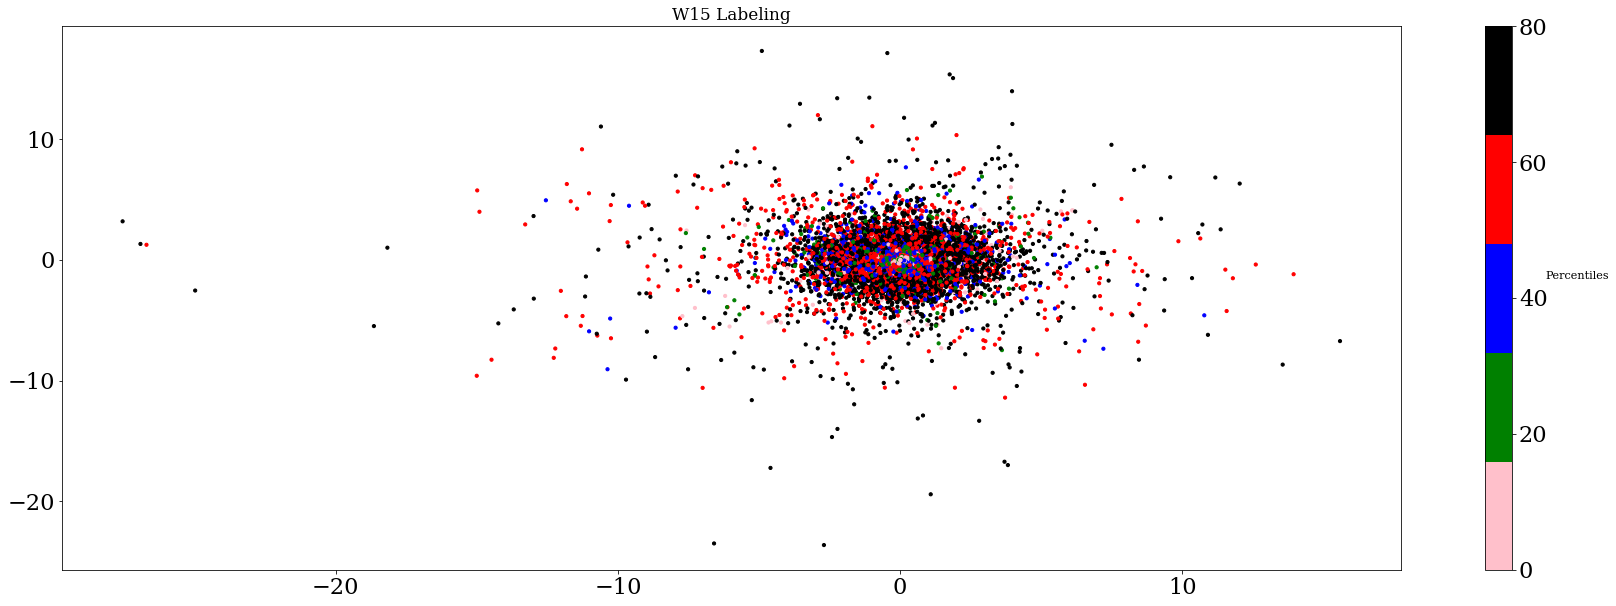

In [61]:
quintiles = np.percentile(W_15, [20,40,60,80])
out = np.searchsorted(quintiles,W_15)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W15 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.0037776767203013054
-0.009398161686876719


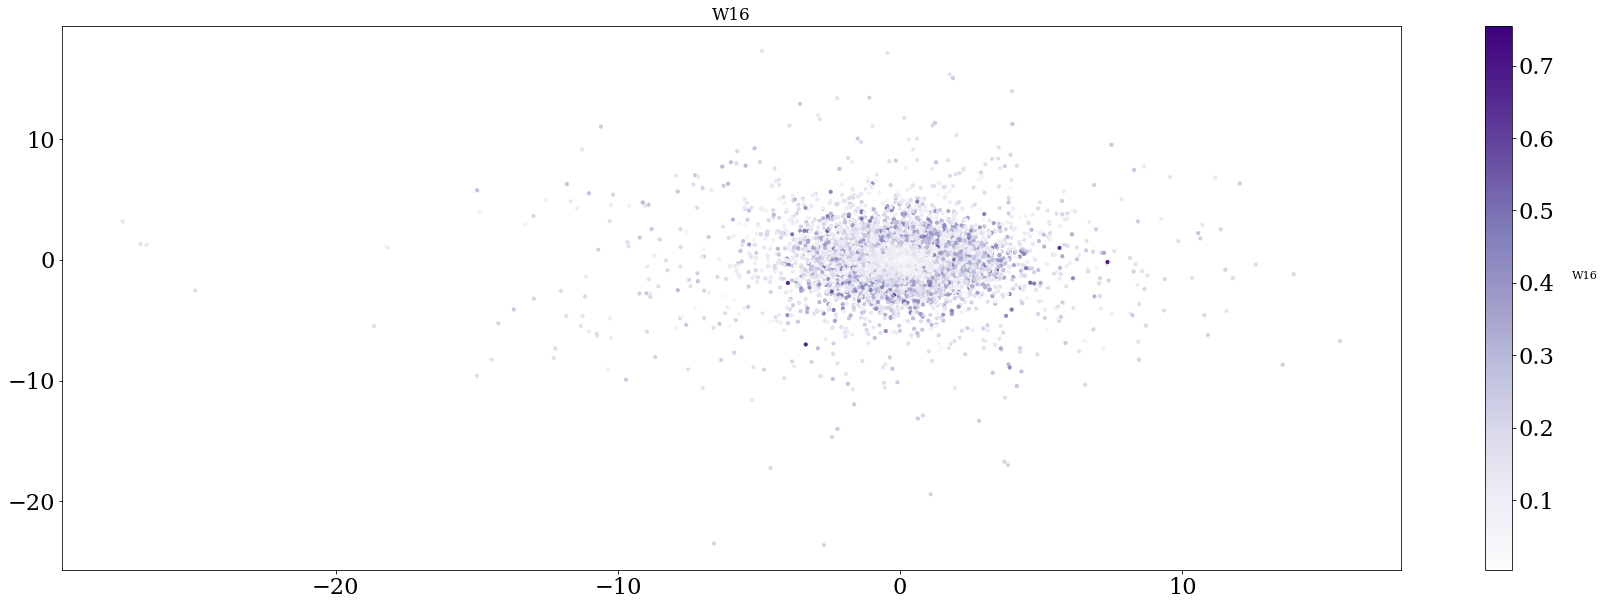

In [62]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_16, cmap="Purples", s=10.0)
ax.set_title("W16", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W16", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_16)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_16)[0])

-0.008133304956393398
-0.0042318604743977


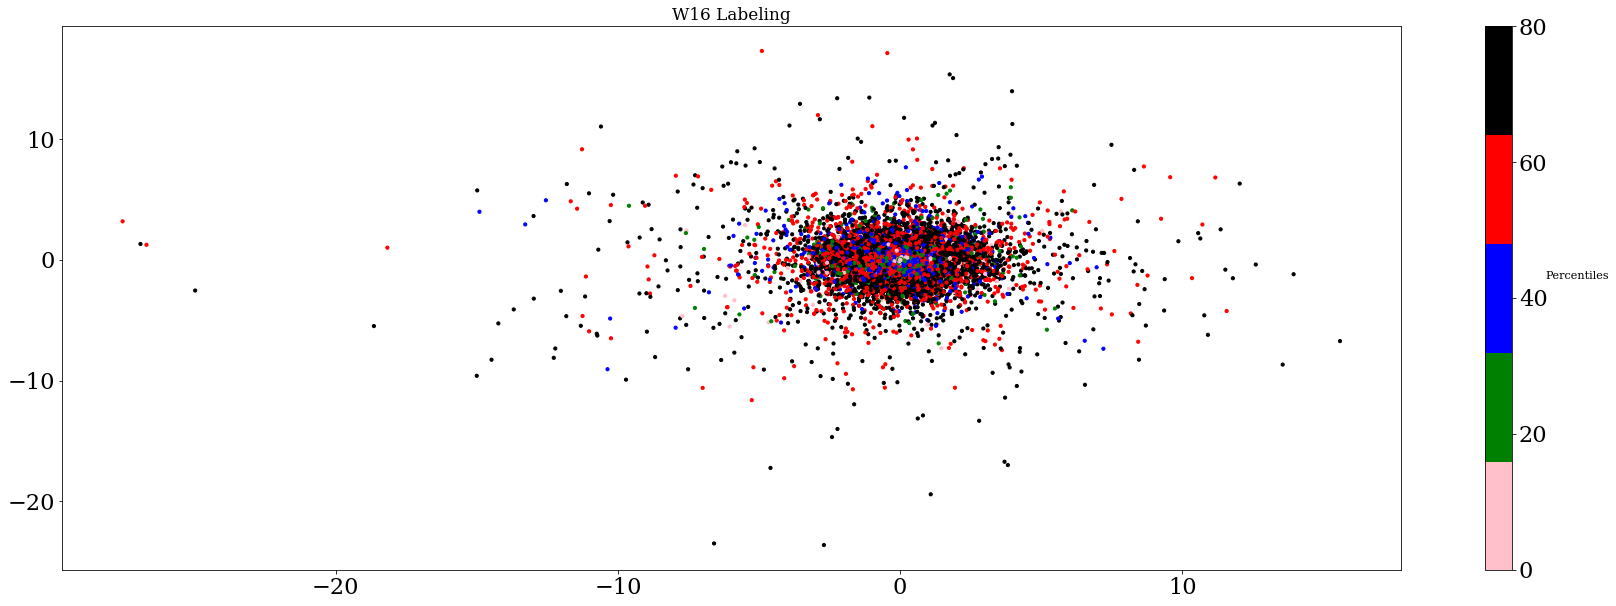

In [63]:
quintiles = np.percentile(W_16, [20,40,60,80])
out = np.searchsorted(quintiles,W_16)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W16 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.005373384414748529
-0.011260898313298538


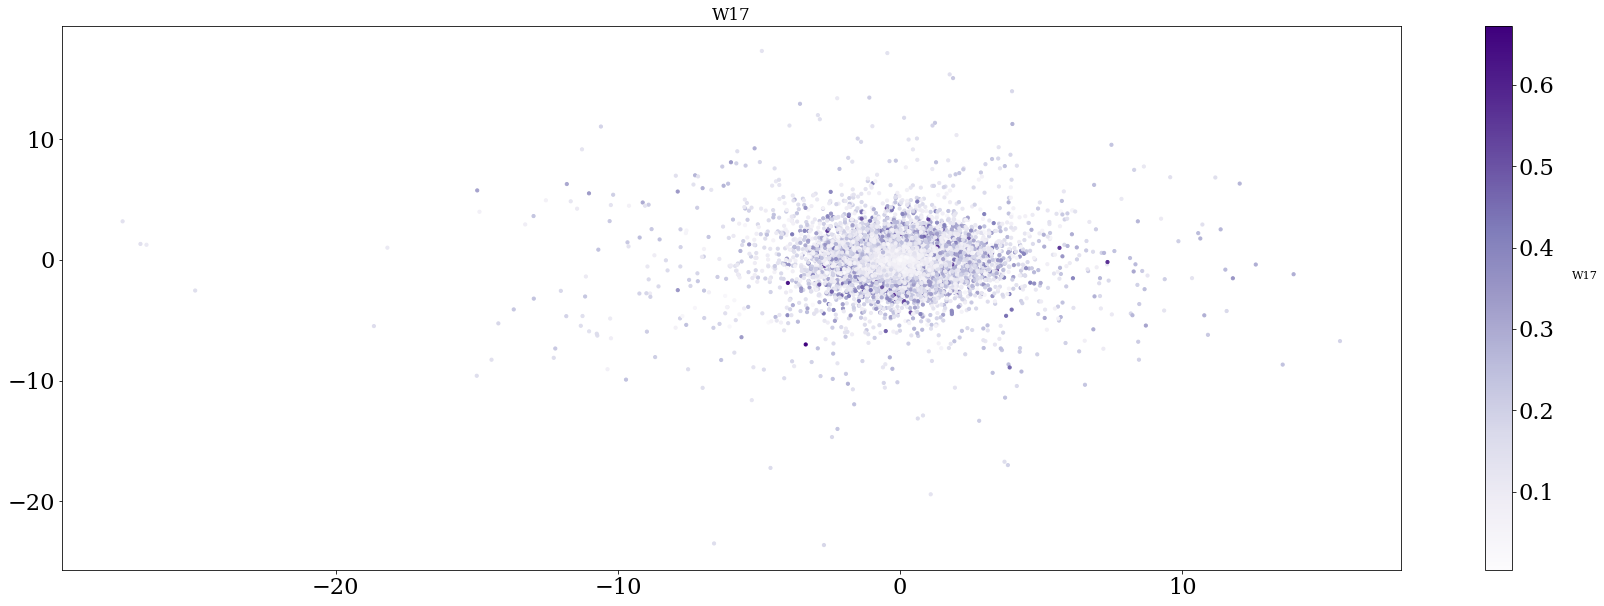

In [64]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_17, cmap="Purples", s=10.0)
ax.set_title("W17", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W17", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_17)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_17)[0])

-0.008171460069320634
-0.004932052661114482


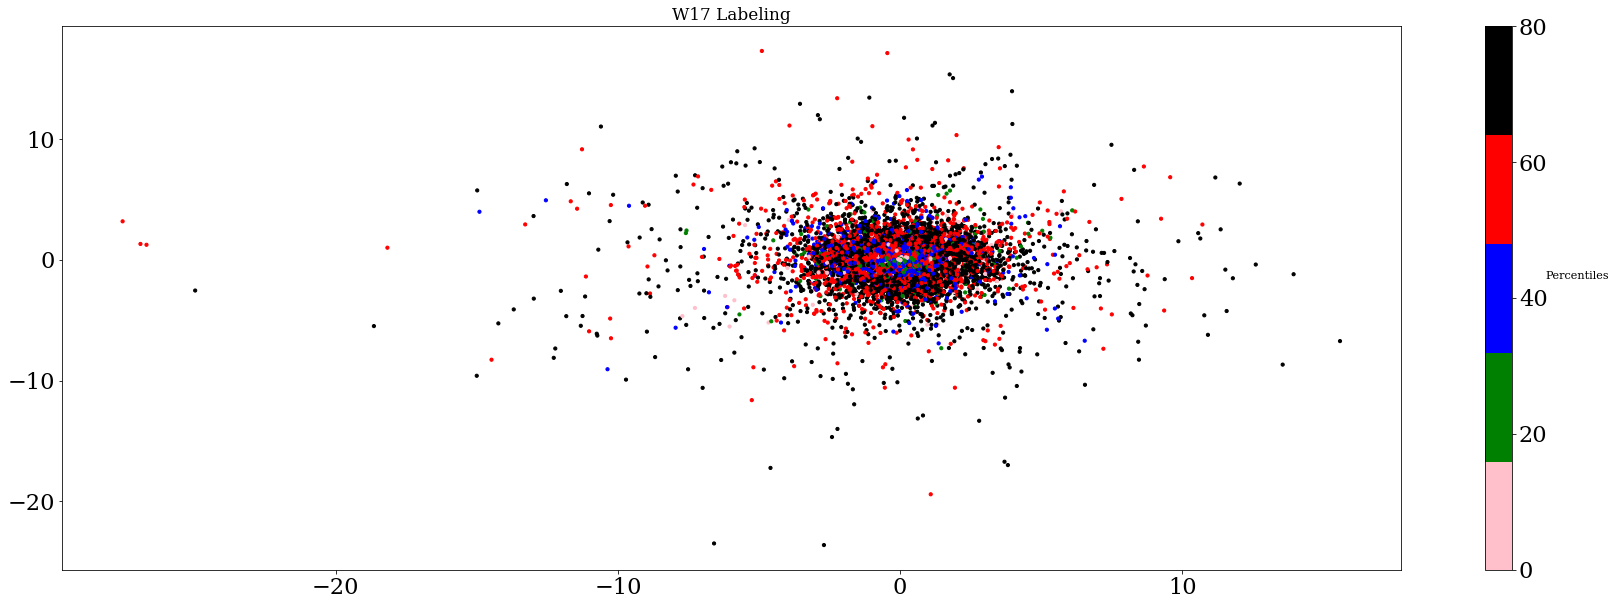

In [65]:
quintiles = np.percentile(W_17, [20,40,60,80])
out = np.searchsorted(quintiles,W_17)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W17 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.0025698176727481105
-0.007829273773141033


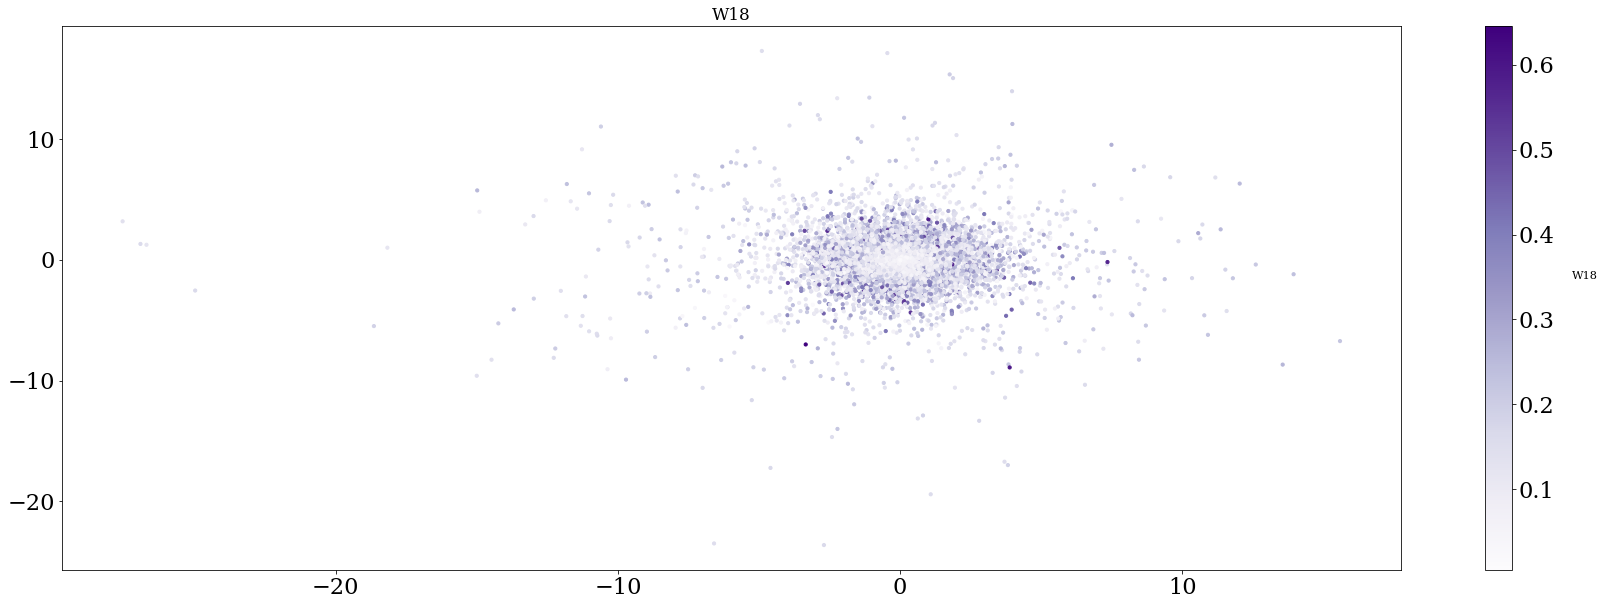

In [66]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_18, cmap="Purples", s=10.0)
ax.set_title("W18", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W18", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_18)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_18)[0])

-0.009540292631678115
-0.002788464090338288


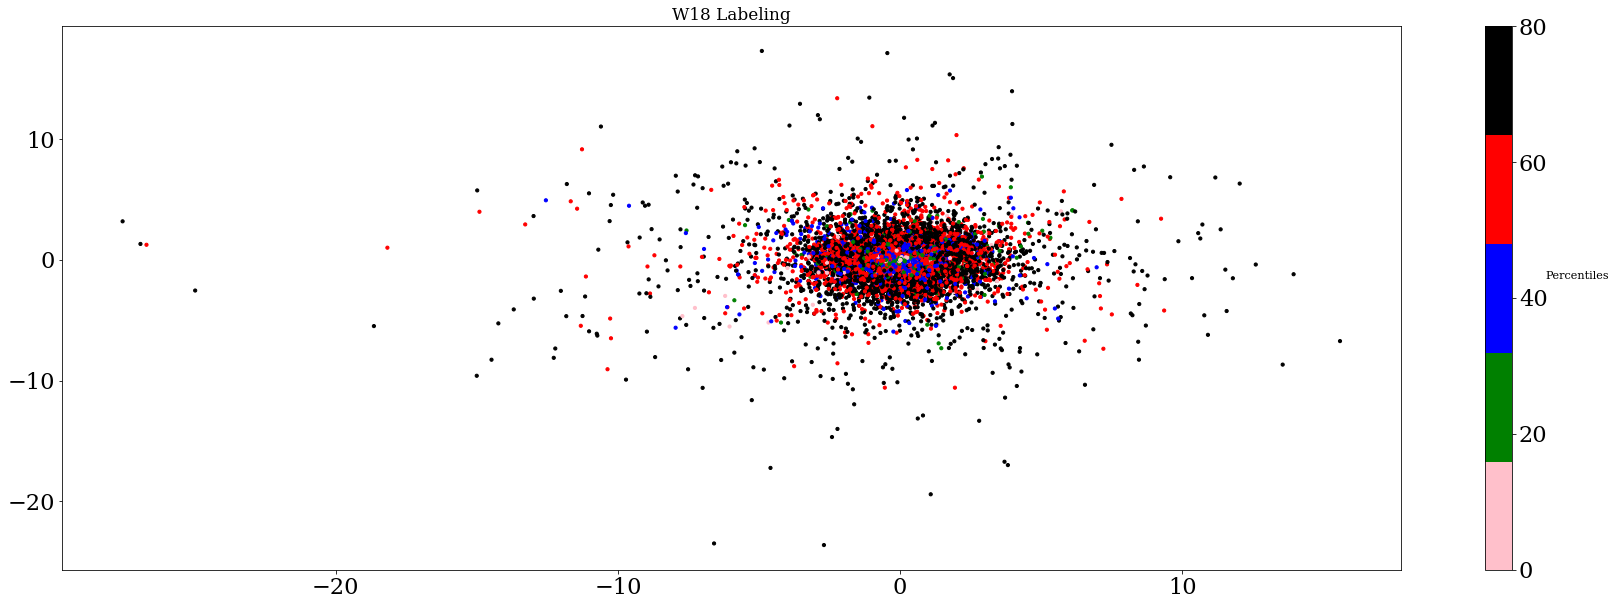

In [67]:
quintiles = np.percentile(W_18, [20,40,60,80])
out = np.searchsorted(quintiles,W_18)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W18 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

0.0002683385313504977
-0.006603078472620038


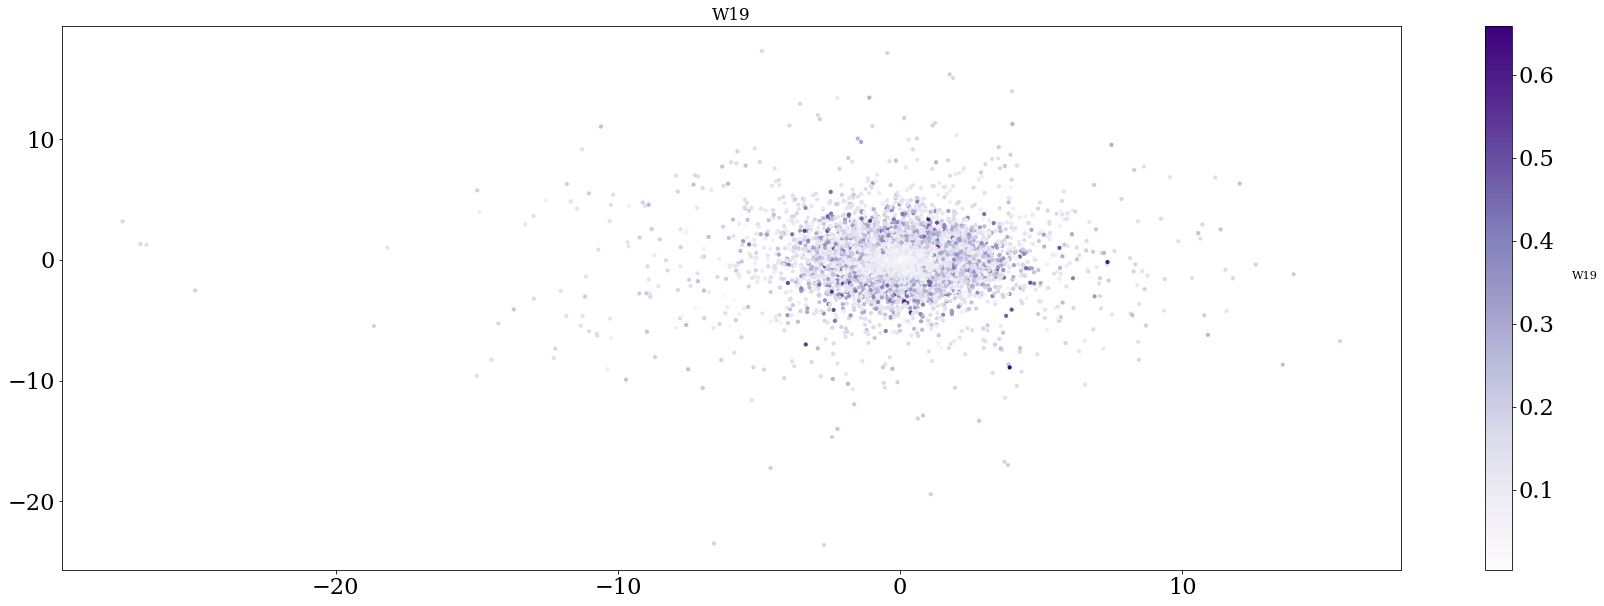

In [68]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_19, cmap="Purples", s=10.0)
ax.set_title("W19", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W19", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_19)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_19)[0])

-0.010505728306614868
-0.0016222954968581555


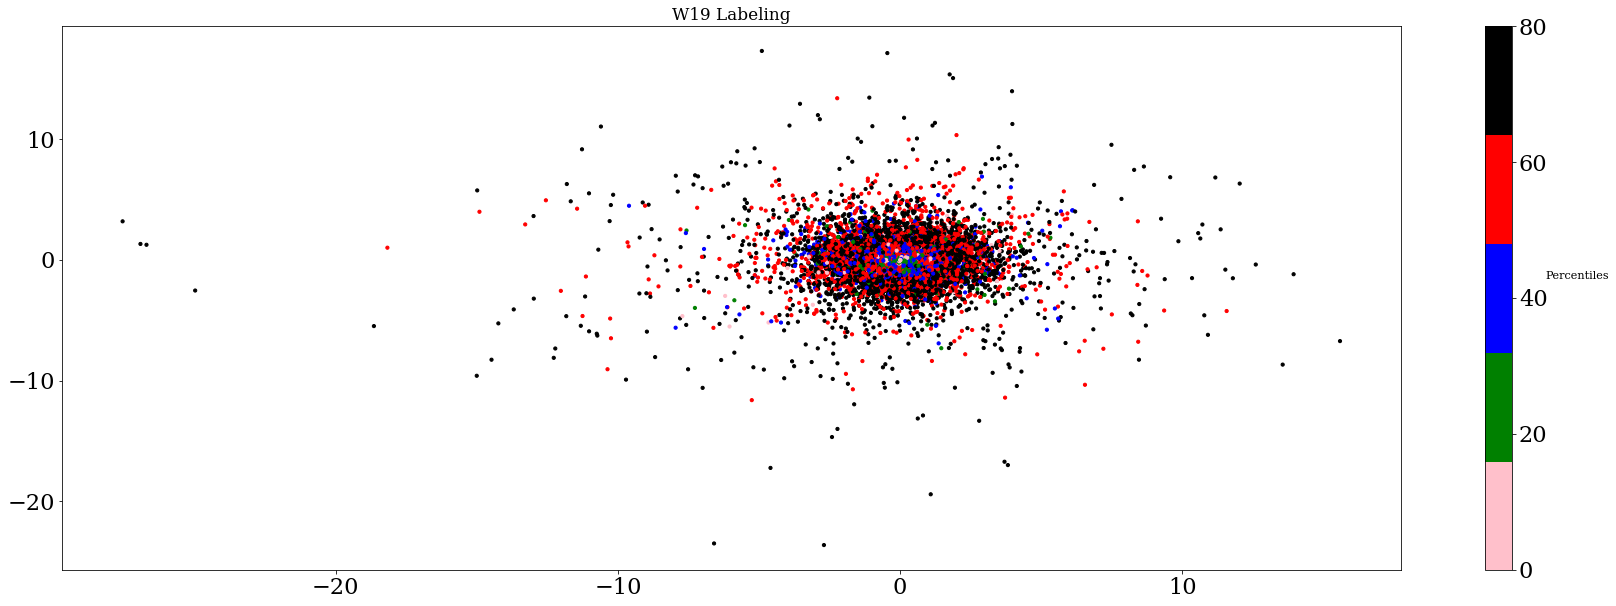

In [69]:
quintiles = np.percentile(W_19, [20,40,60,80])
out = np.searchsorted(quintiles,W_19)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W19 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.004655674882930239
-0.013269307464421752


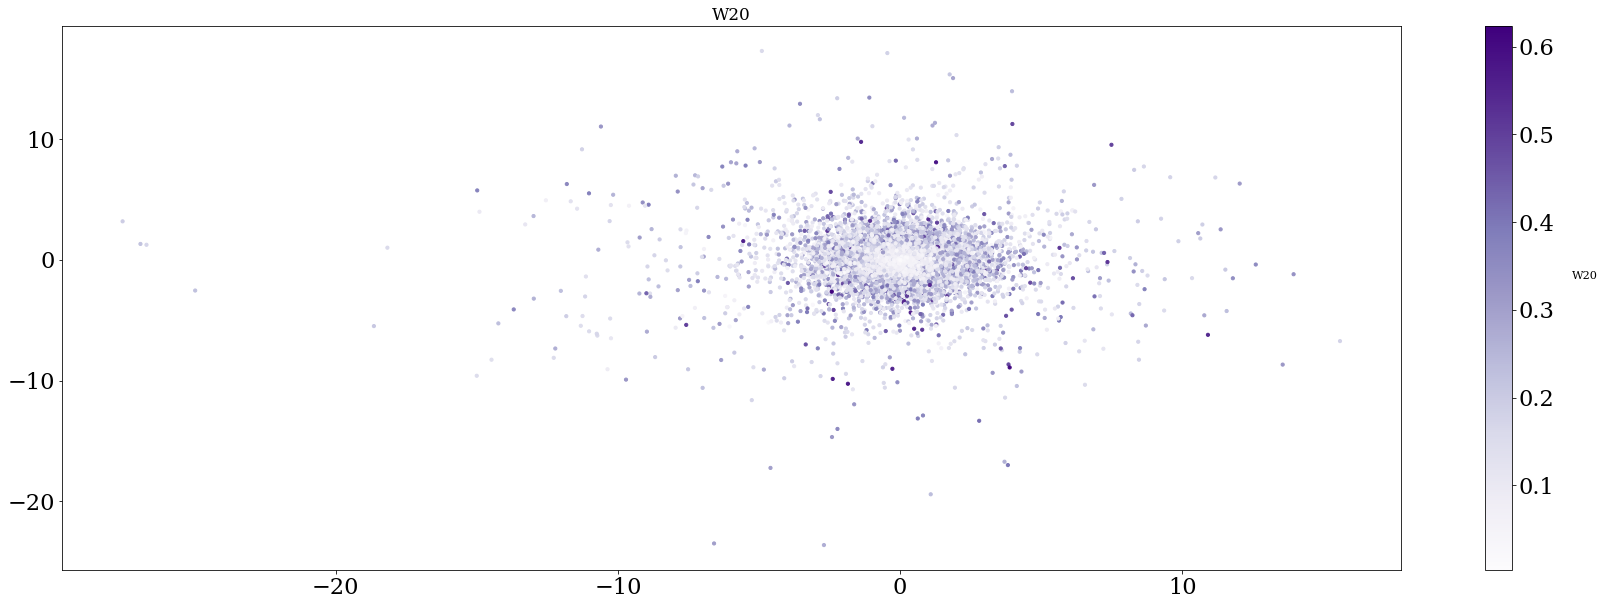

In [70]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_20, cmap="Purples", s=10.0)
ax.set_title("W20", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W20", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_20)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_20)[0])

-0.01114918398433718
-0.003324255753840562


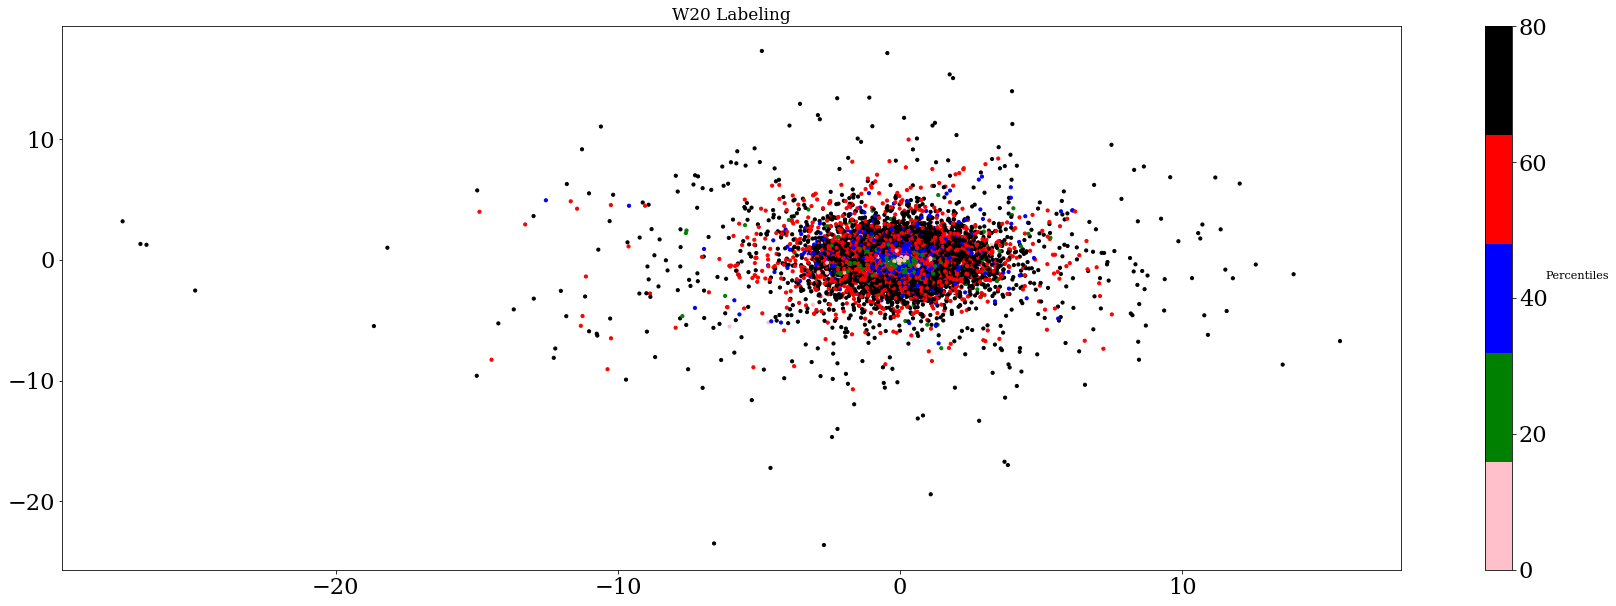

In [71]:
quintiles = np.percentile(W_20, [20,40,60,80])
out = np.searchsorted(quintiles,W_20)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W20 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.03932157390165828
-0.03186271413106284


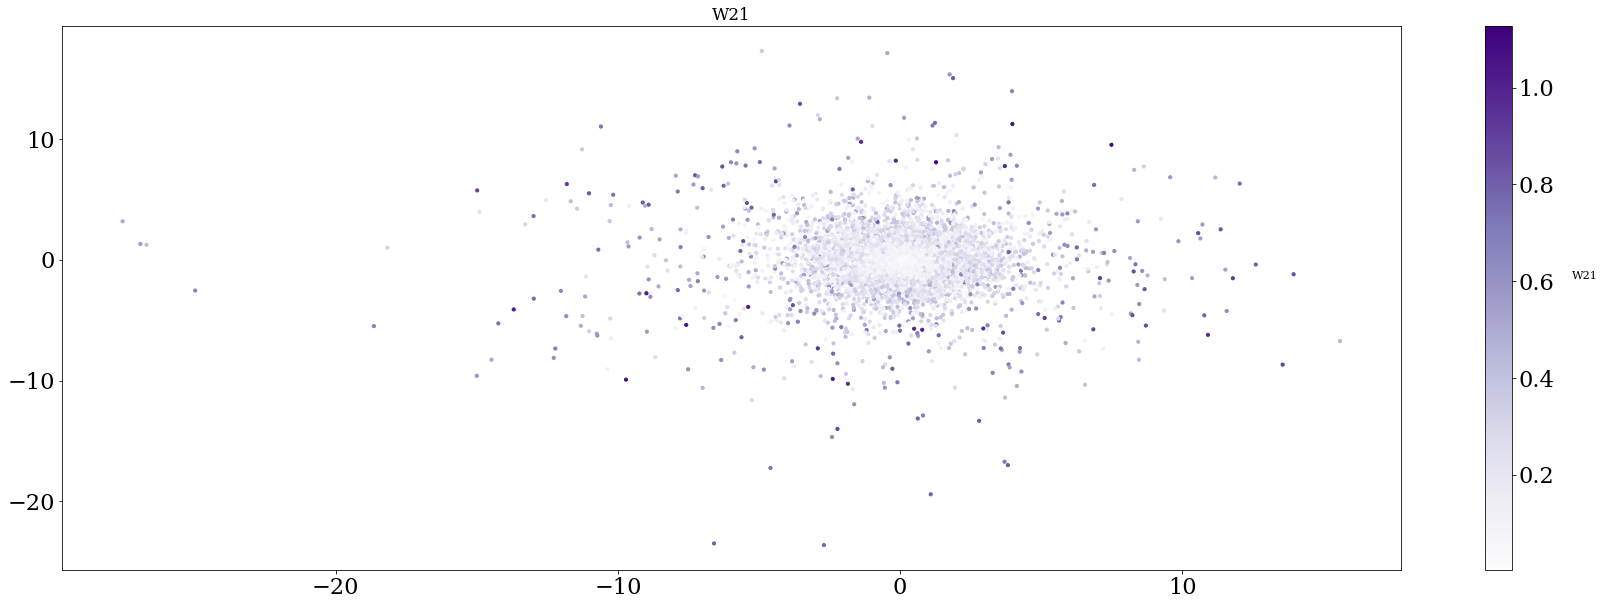

In [72]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_21, cmap="Purples", s=10.0)
ax.set_title("W21", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W21", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_21)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_21)[0])

-0.014851379378273364
-0.002765099930075639


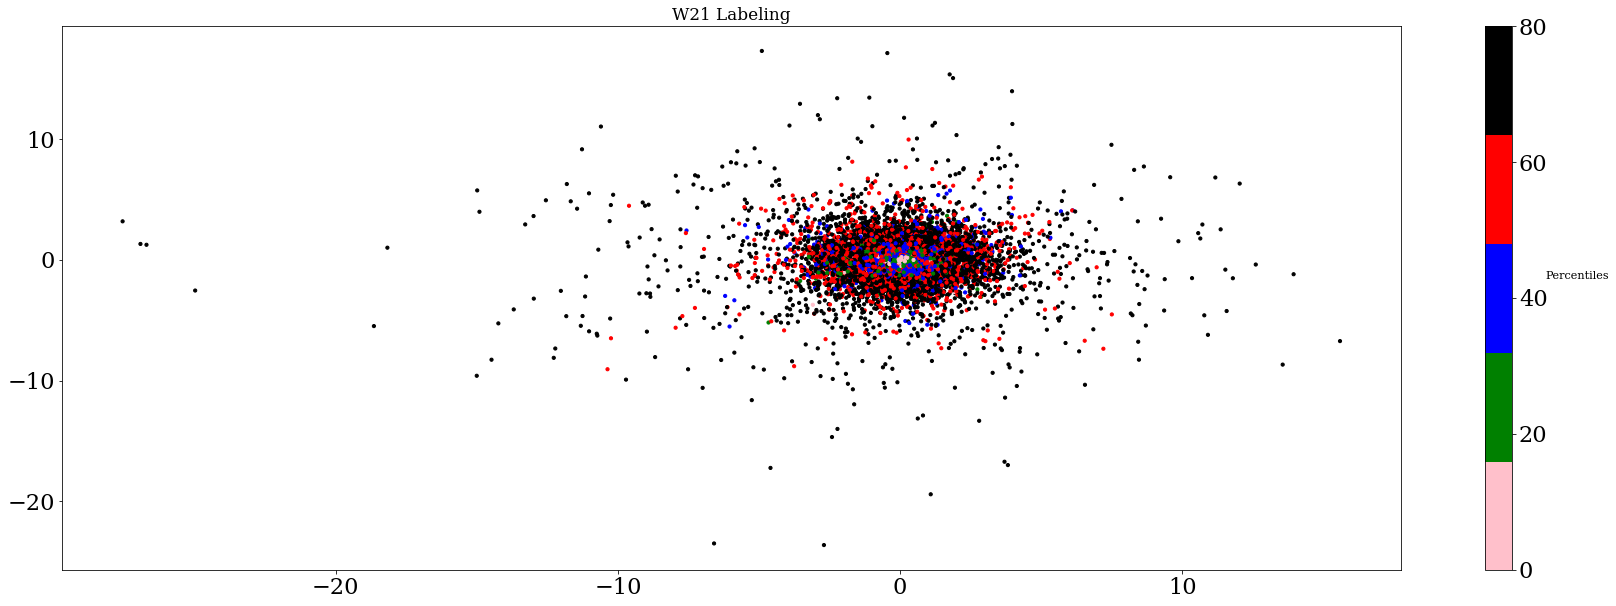

In [73]:
quintiles = np.percentile(W_21, [20,40,60,80])
out = np.searchsorted(quintiles,W_21)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W21 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.06742641823422237
-0.028965621110087818


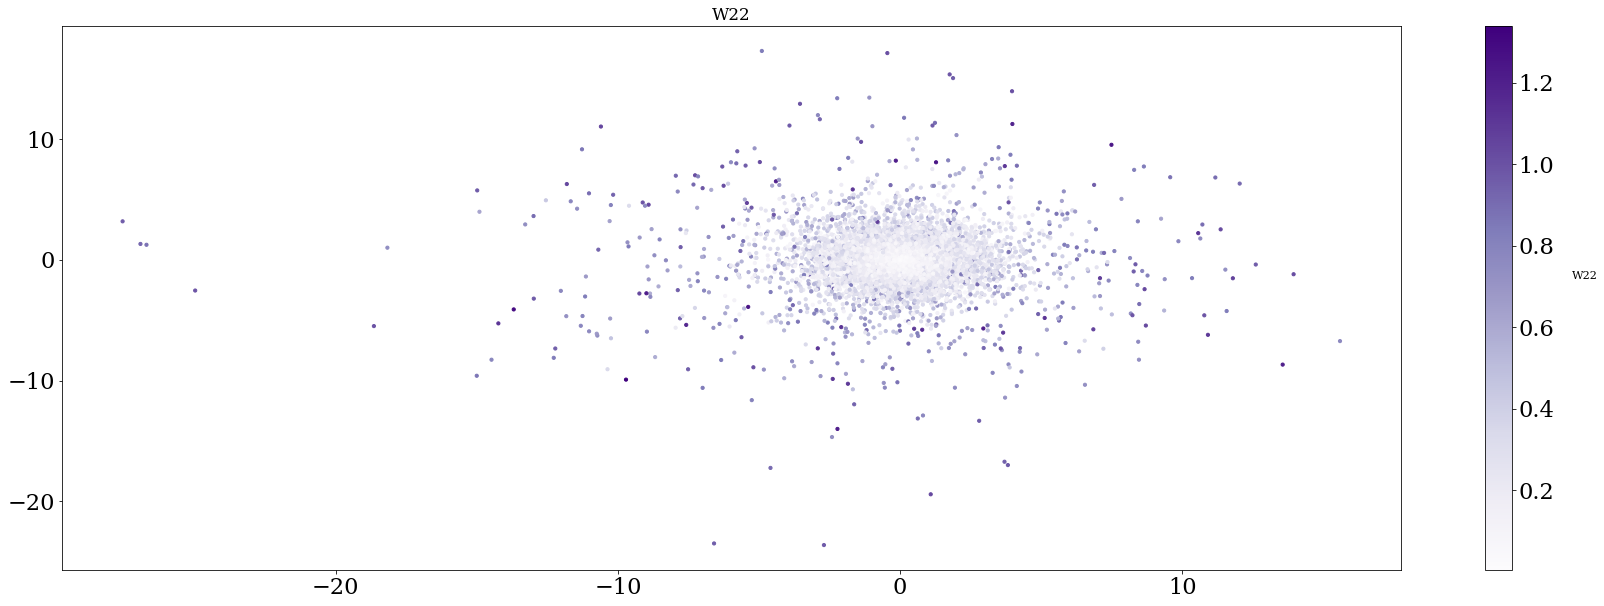

In [74]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_22, cmap="Purples", s=10.0)
ax.set_title("W22", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W22", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_22)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_22)[0])

-0.01648859913026718
-0.0018470777397806525


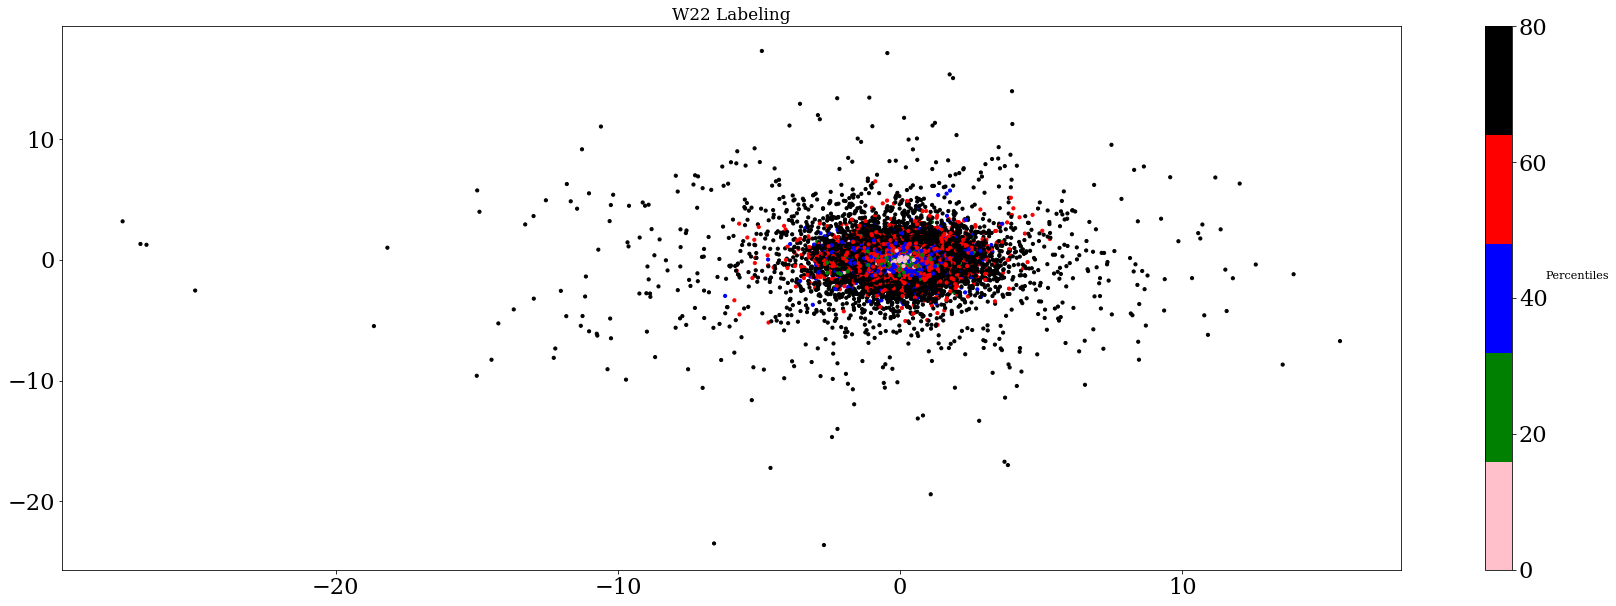

In [75]:
quintiles = np.percentile(W_22, [20,40,60,80])
out = np.searchsorted(quintiles,W_22)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W22 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.07384751002134894
-0.019145775172093725


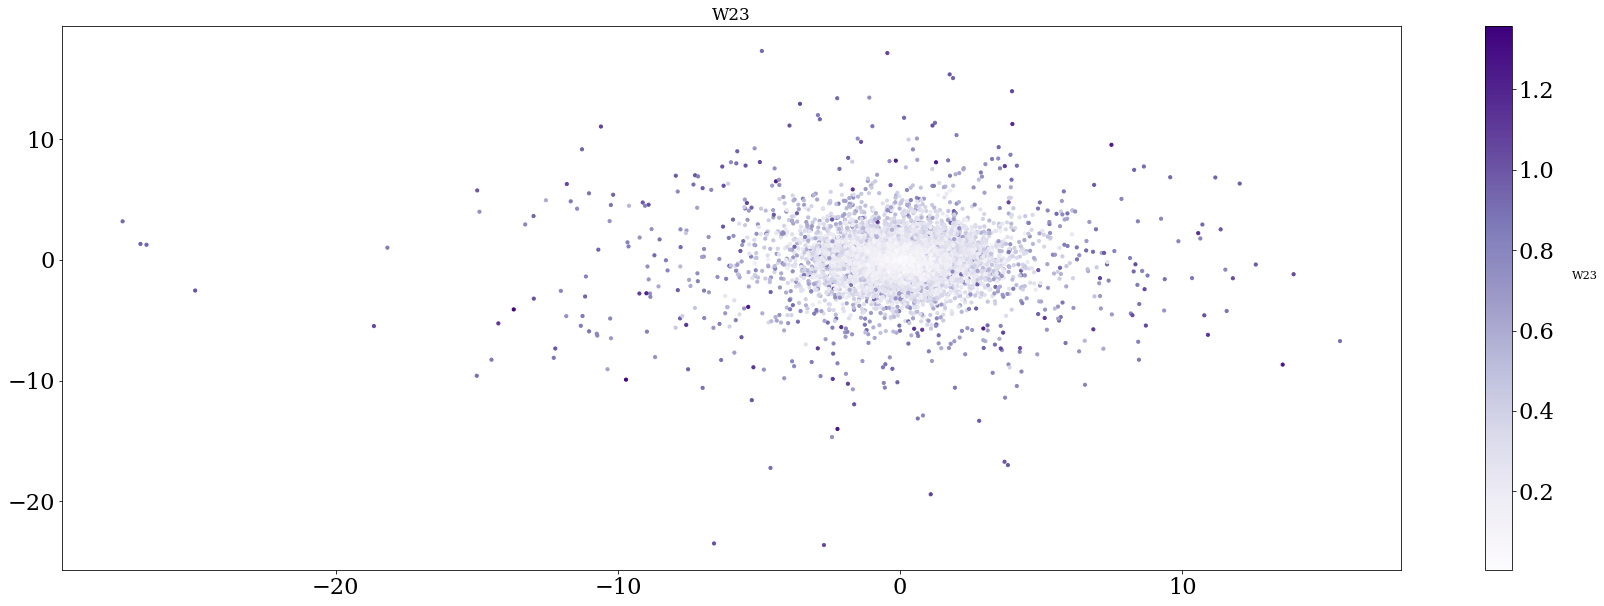

In [76]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_23, cmap="Purples", s=10.0)
ax.set_title("W23", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W23", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_23)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_23)[0])

-0.018002901996358716
0.0005793633422538332


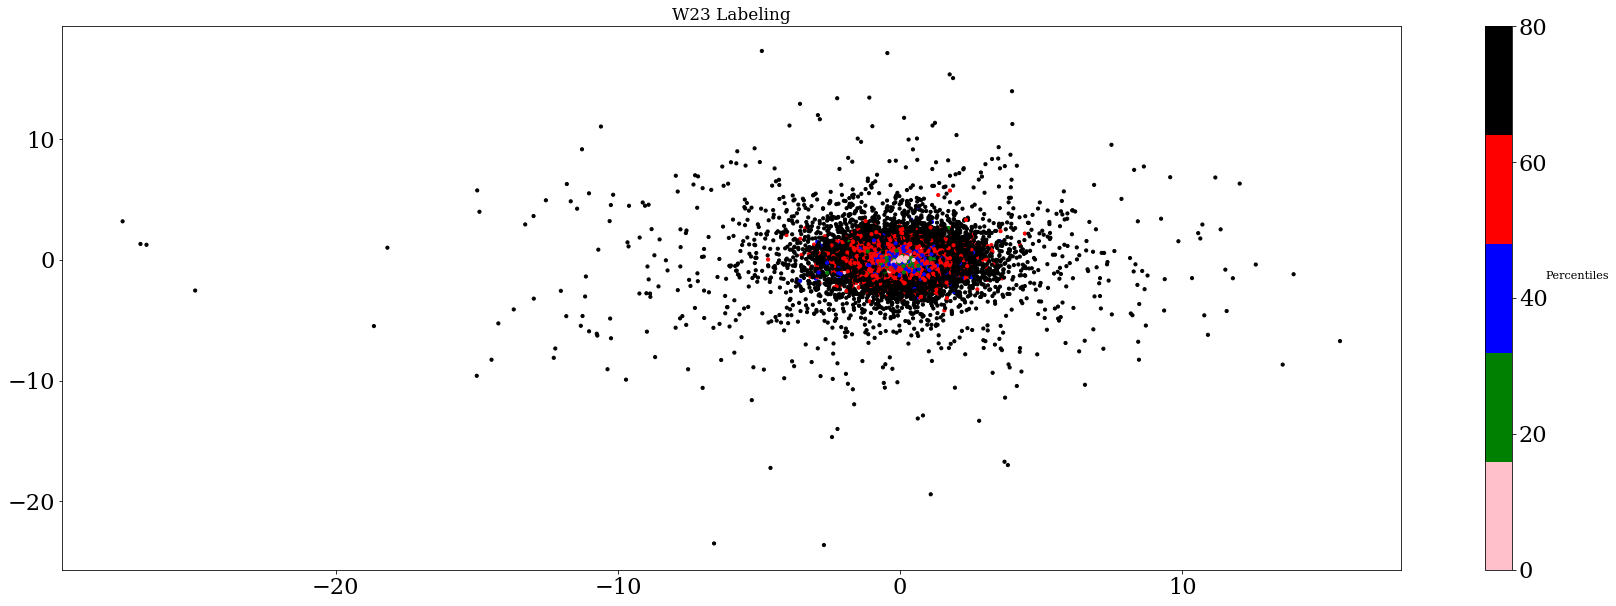

In [77]:
quintiles = np.percentile(W_23, [20,40,60,80])
out = np.searchsorted(quintiles,W_23)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W23 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.07437612253239076
-0.011910585811107353


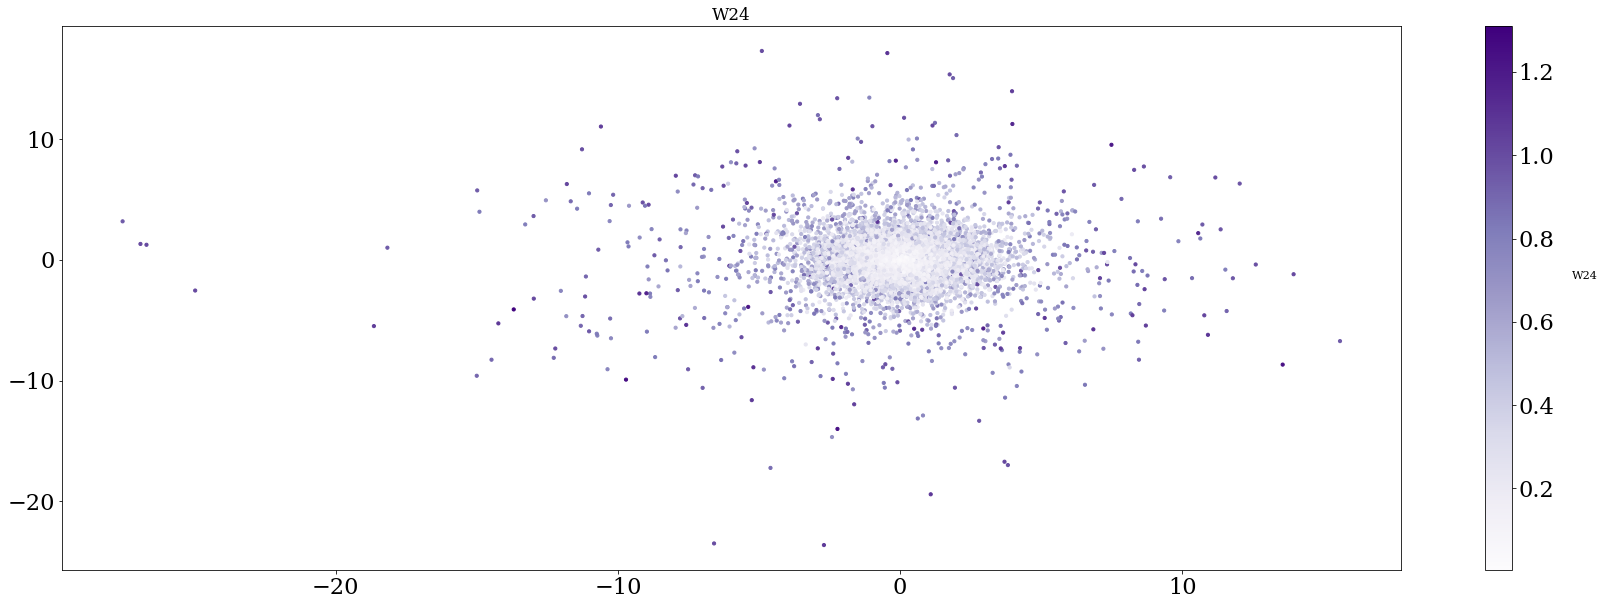

In [78]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_24, cmap="Purples", s=10.0)
ax.set_title("W24", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W24", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_24)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_24)[0])

-0.018626604855581468
0.000783400164927872


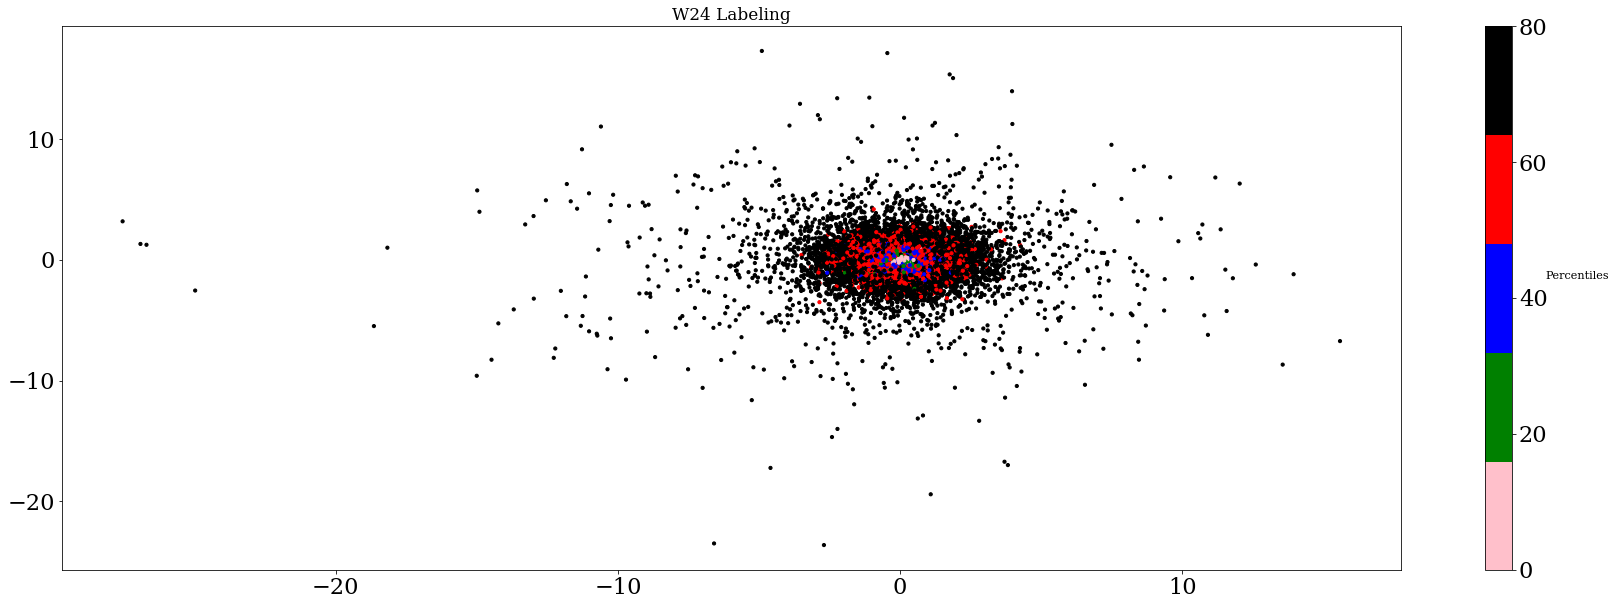

In [79]:
quintiles = np.percentile(W_24, [20,40,60,80])
out = np.searchsorted(quintiles,W_24)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W24 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.06873245176919299
-0.008404874285372205


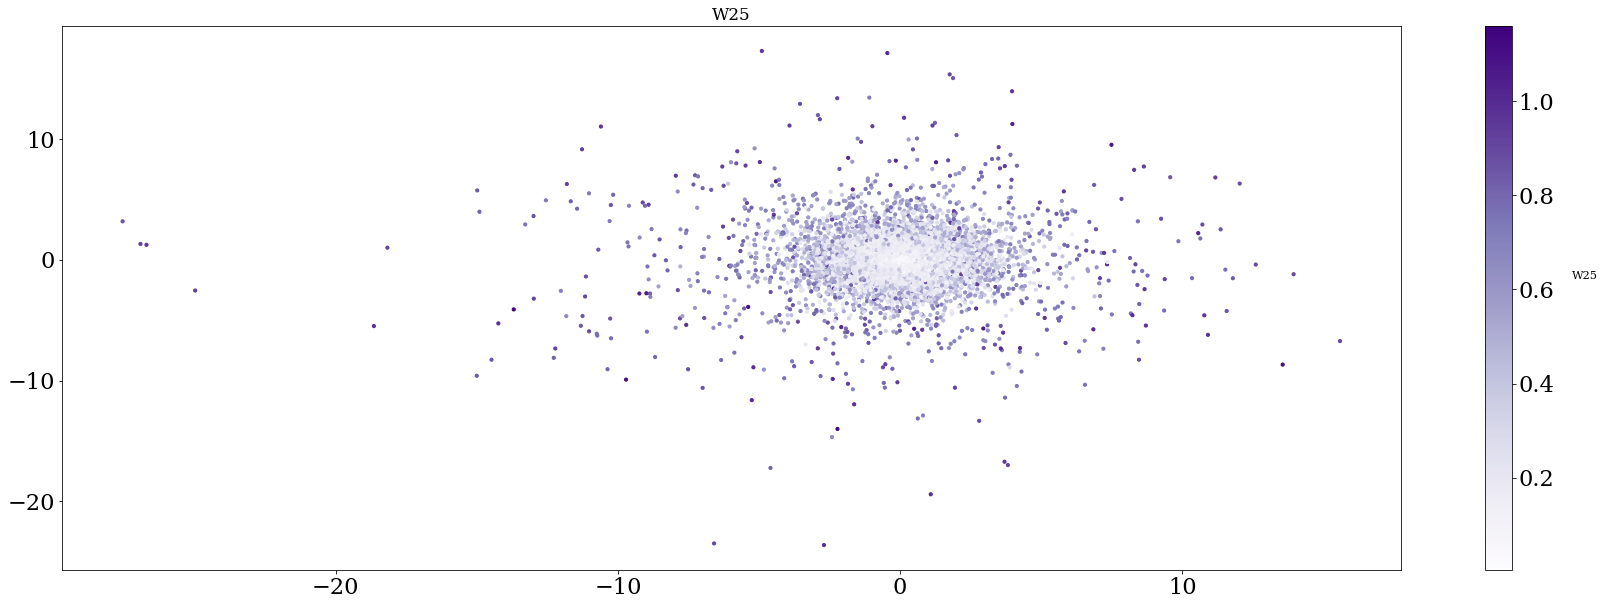

In [80]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_25, cmap="Purples", s=10.0)
ax.set_title("W25", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W25", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_25)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_25)[0])

-0.017813981881009022
0.00013962042703070596


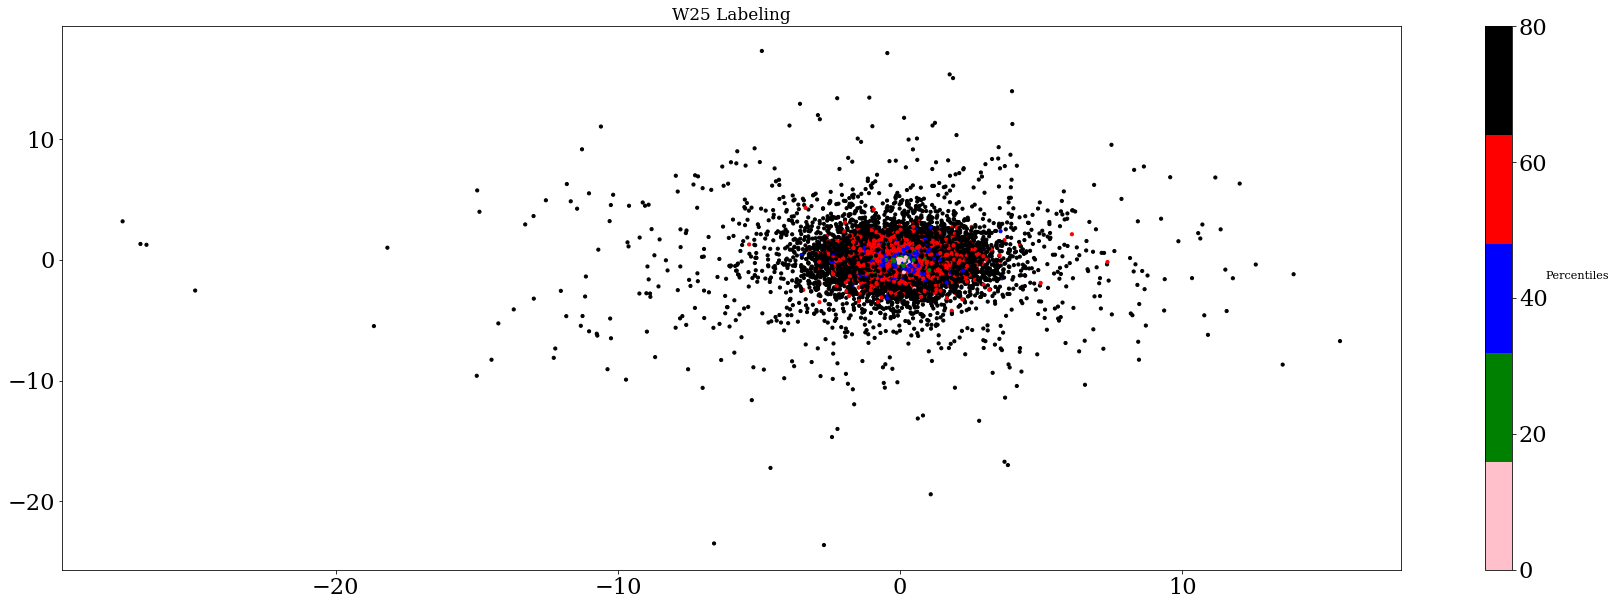

In [81]:
quintiles = np.percentile(W_25, [20,40,60,80])
out = np.searchsorted(quintiles,W_25)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W25 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.0639546962409848
-0.007990834529253742


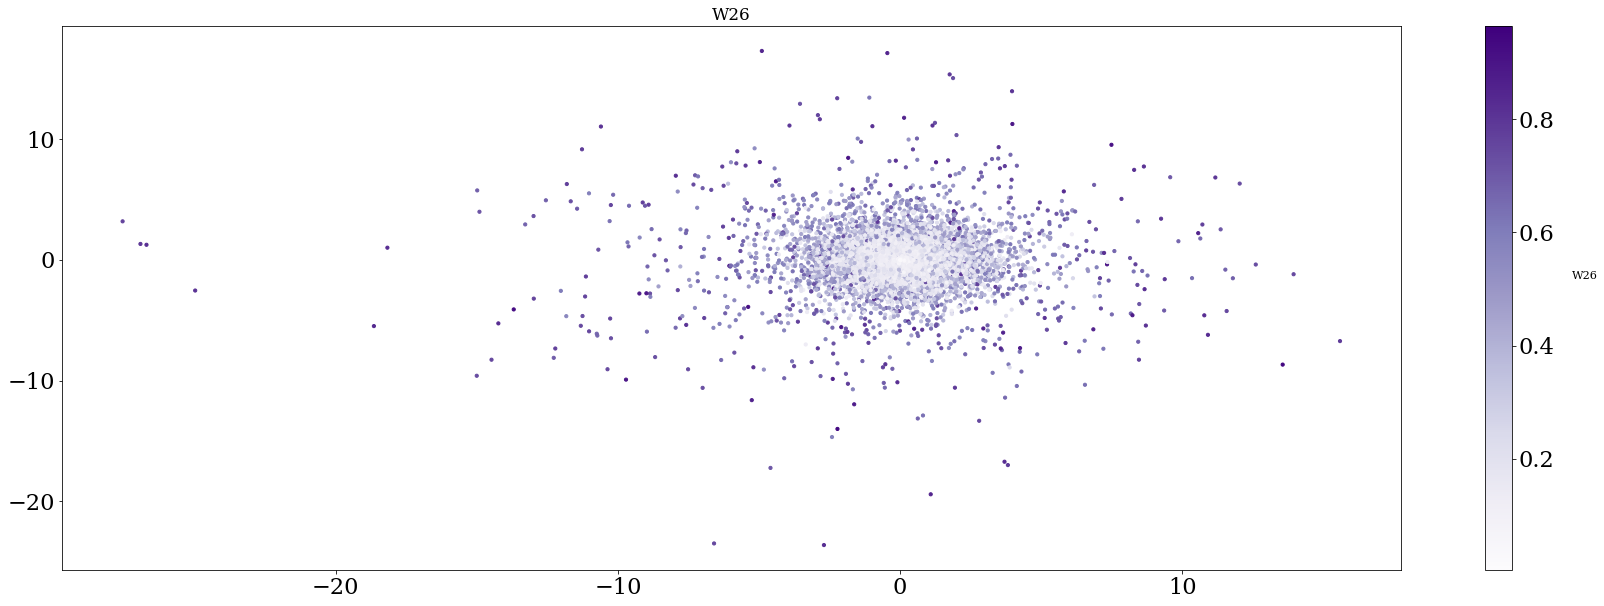

In [82]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_26, cmap="Purples", s=10.0)
ax.set_title("W26", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W26", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_26)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_26)[0])

-0.016395358843092785
-0.00017351509854589102


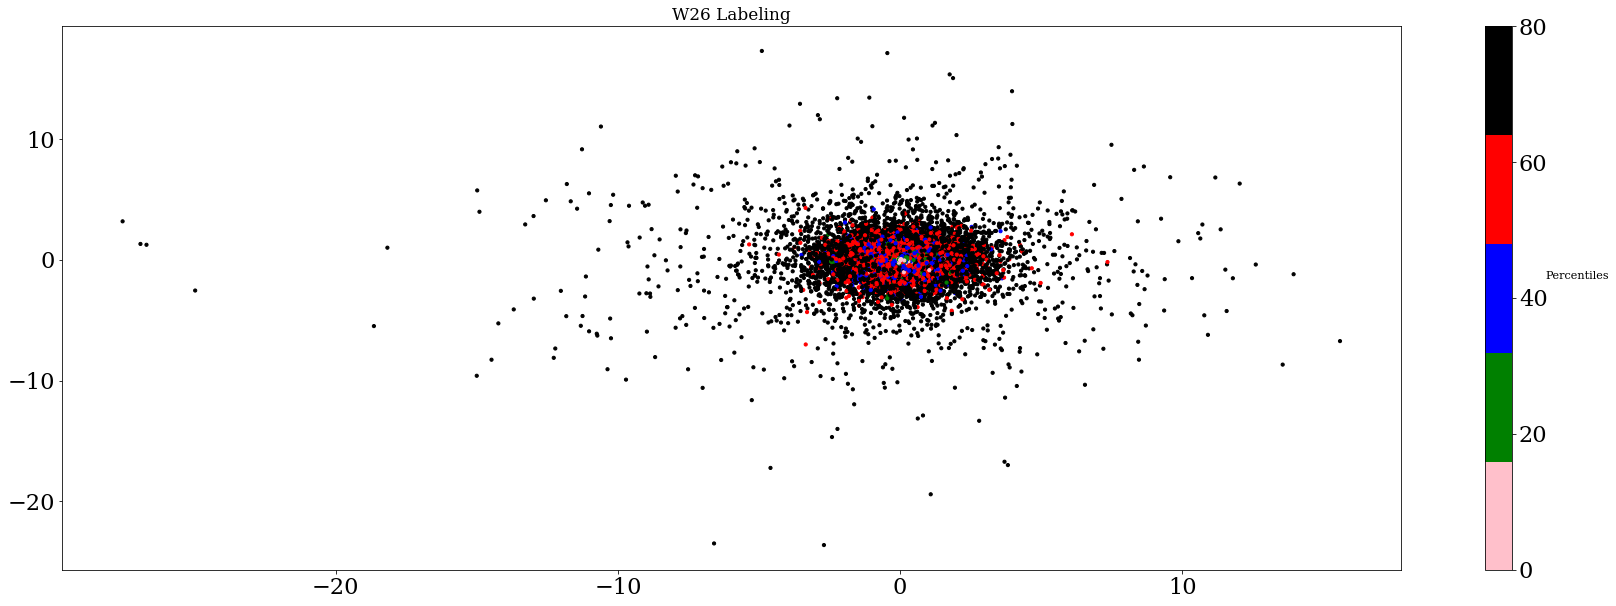

In [83]:
quintiles = np.percentile(W_26, [20,40,60,80])
out = np.searchsorted(quintiles,W_26)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W26 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.060899520797667014
-0.007872545129089512


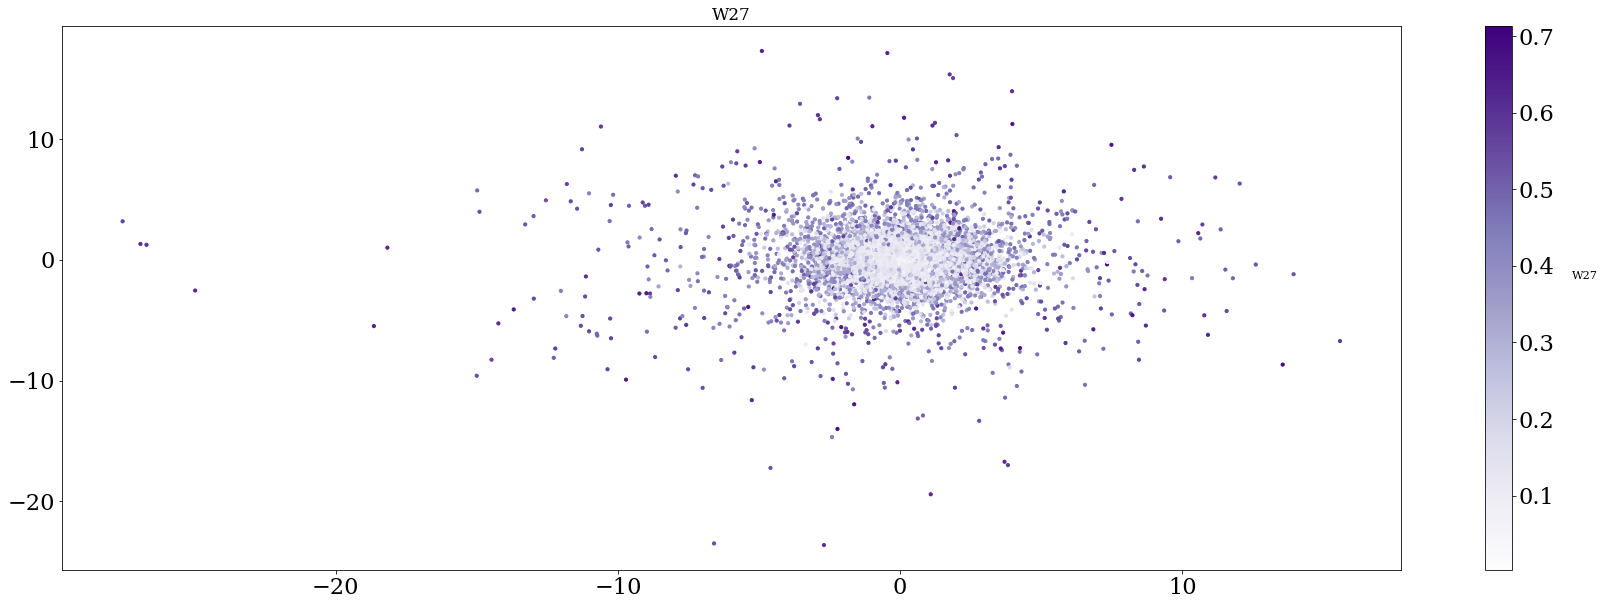

In [84]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_27, cmap="Purples", s=10.0)
ax.set_title("W27", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W27", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_27)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_27)[0])

-0.016286661128082948
0.0003429203180280219


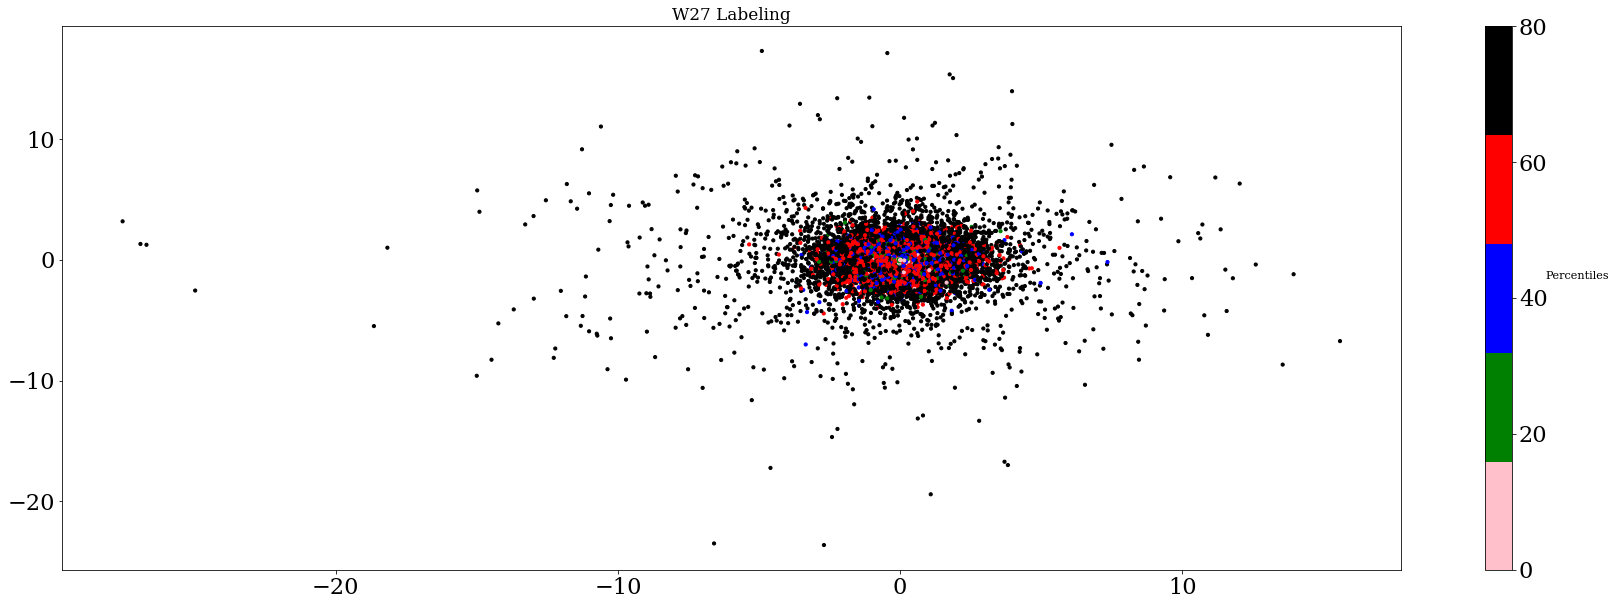

In [85]:
quintiles = np.percentile(W_27, [20,40,60,80])
out = np.searchsorted(quintiles,W_27)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W27 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

-0.06060308235190445
-0.008756681725985555


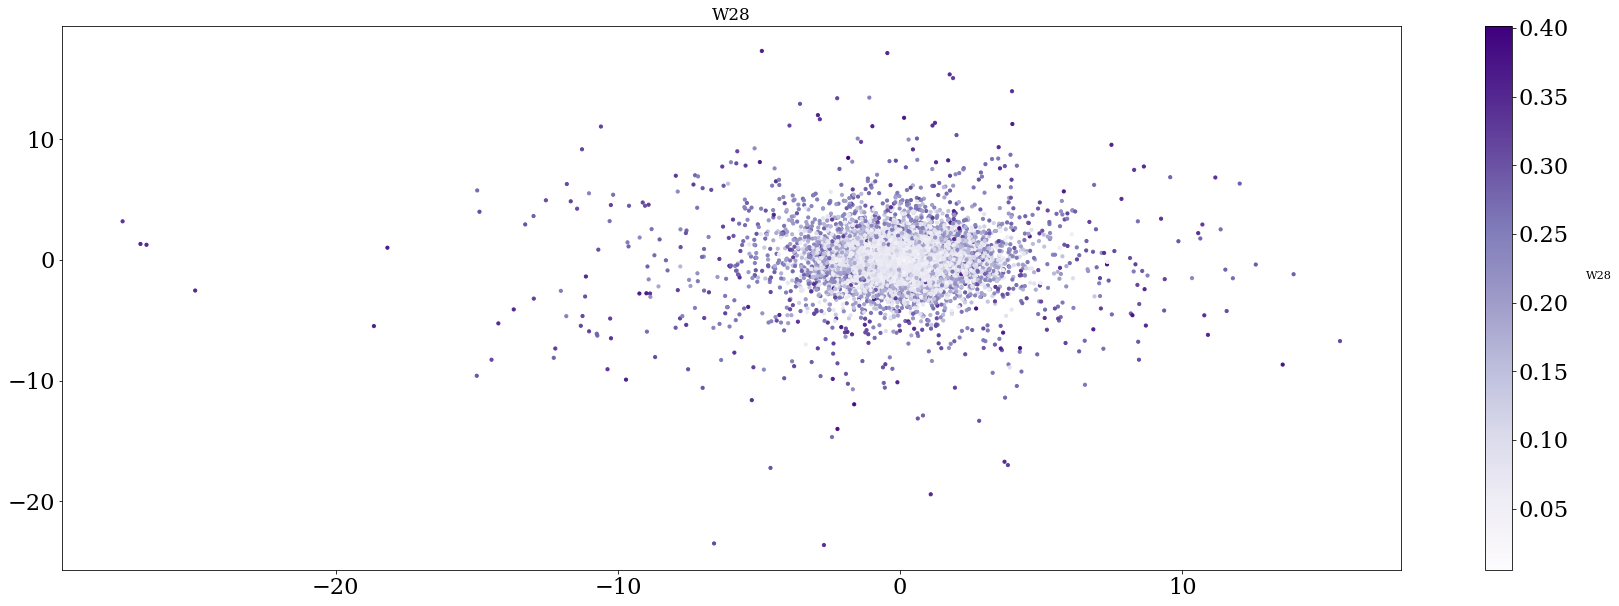

In [86]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_28, cmap="Purples", s=10.0)
ax.set_title("W28", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W28", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_28)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_28)[0])

-0.01666112683281009
0.00010338360837629365


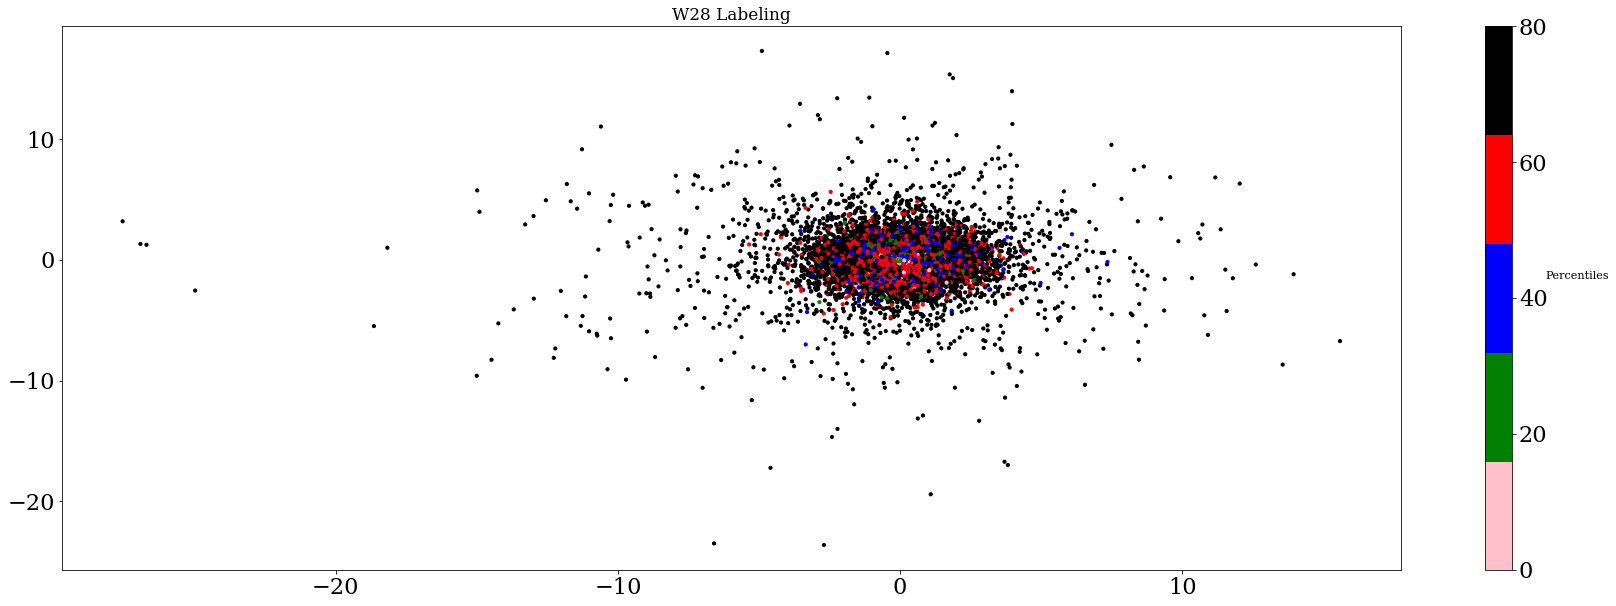

In [87]:
quintiles = np.percentile(W_28, [20,40,60,80])
out = np.searchsorted(quintiles,W_28)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W28 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


nan
nan


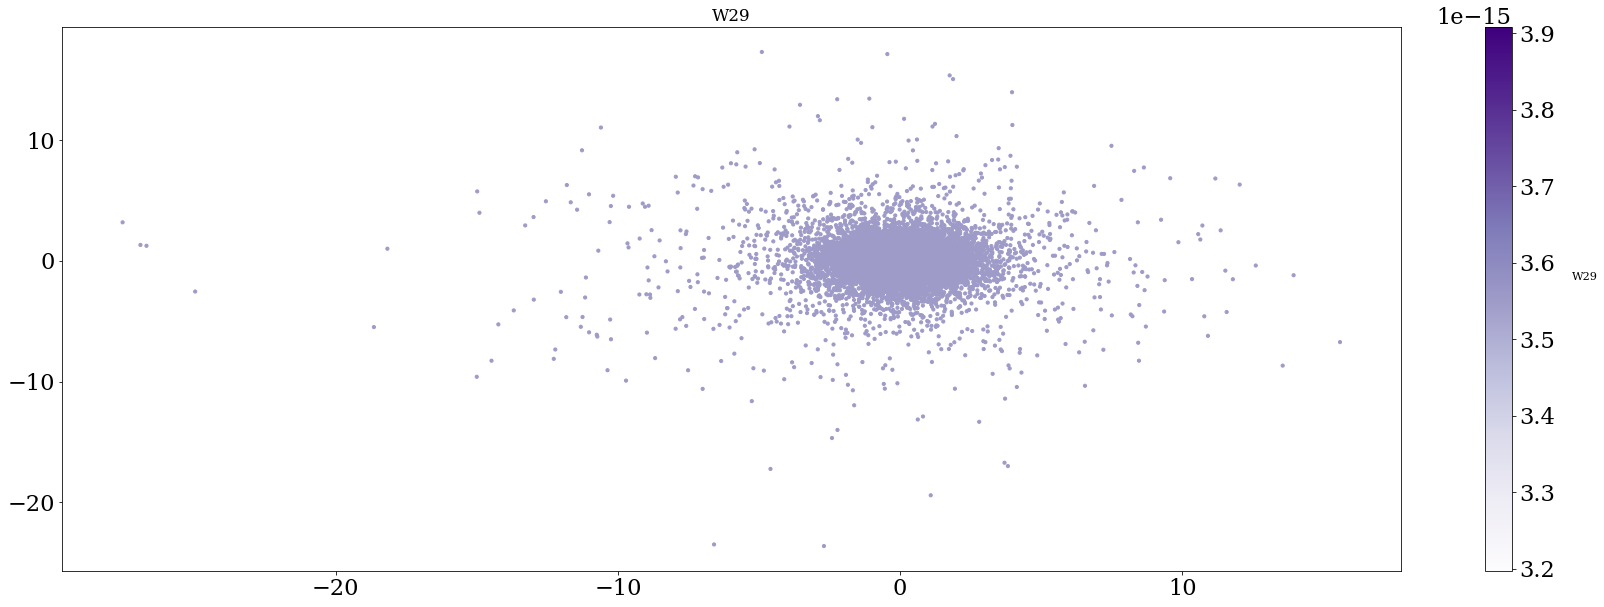

In [88]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_29, cmap="Purples", s=10.0)
ax.set_title("W29", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="W29", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_29)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_29)[0])

nan
nan


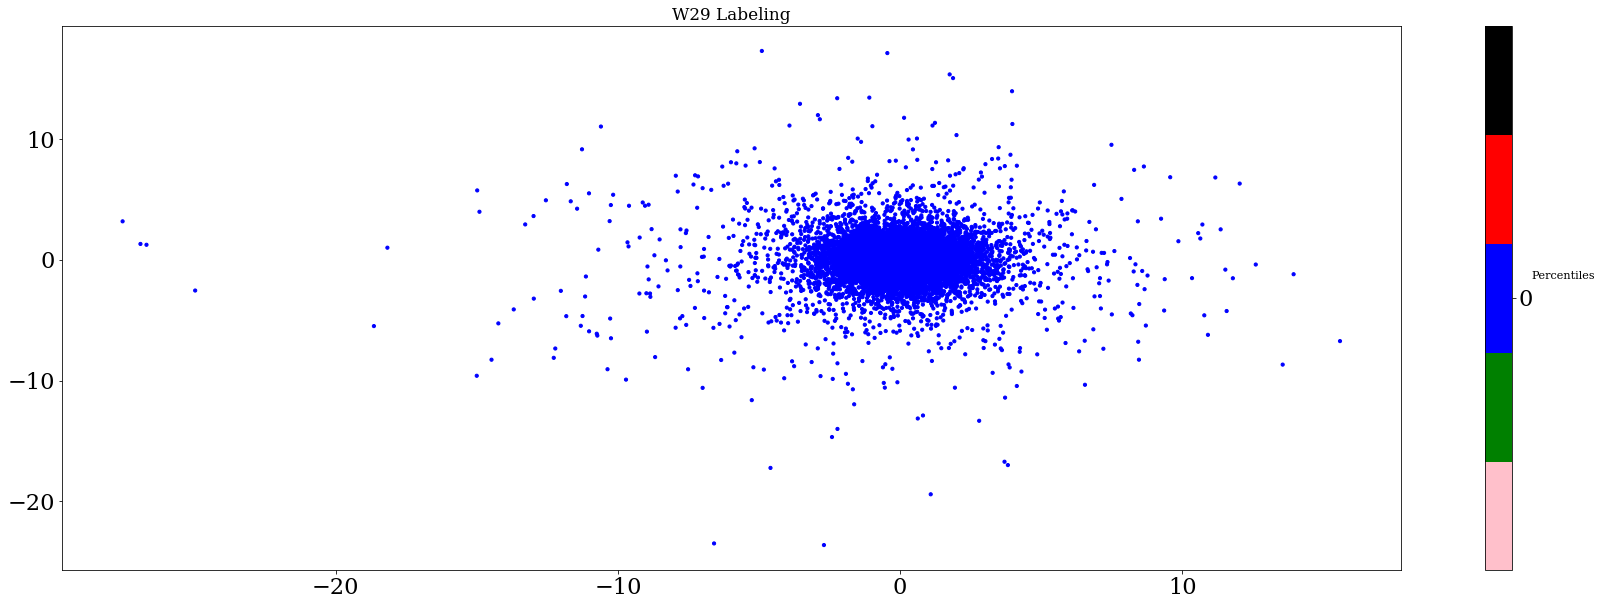

In [89]:
quintiles = np.percentile(W_29, [20,40,60,80])
out = np.searchsorted(quintiles,W_29)

cmap = matplotlib.colors.ListedColormap(["pink", "green", "blue","red","black"])
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=out, cmap=cmap, s=10.0)
ax.set_title("W29 Labeling", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="Percentiles", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(["0","20","40","60","80"])

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], out)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], out)[0])